# Alternatör Veri Analizi


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df_yuklu = pd.read_excel('excelData.xlsx', sheet_name='yuklu')

In [3]:
df_yuksuz = pd.read_excel('excelData.xlsx', sheet_name='yuksuz')

In [4]:
df_aku = pd.read_excel('excelData.xlsx', sheet_name='akuSarj')

In [5]:
df_yuklu = df_yuklu.dropna(subset=['Alternatör Devri'])
df_yuksuz = df_yuksuz.dropna(subset=['Alternatör Devri'])
df_aku = df_aku.dropna(subset=['Alternatör Devri'])

## EDA - Exploratory Data Analysis

### Yüklü 

In [6]:
df_yuklu.head()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
0,24.103702,14.352112,2.334595e-07,4106.094360,8.602551,0.000000e+00,14.608765
1,24.039899,14.331665,2.731323e-07,4081.741333,8.628186,9.155273e-16,14.577942
2,24.295111,14.344788,7.324219e-08,4107.833862,8.612317,3.051758e-16,14.602356
3,24.333948,14.318542,6.561279e-08,4109.573364,8.589429,4.272461e-15,14.620361
4,24.220212,14.337769,1.327515e-07,4051.300049,8.572034,2.593994e-15,14.592285


In [7]:
df_yuklu.shape

(901, 7)

In [8]:
df_yuklu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sıcaklık             901 non-null    float64
 1   Alternatör Gerilimi  901 non-null    float64
 2   Alternatör Akımı     901 non-null    float64
 3   Alternatör Devri     901 non-null    float64
 4   Yakıt Tüketimi       901 non-null    float64
 5   Yük Akımı            901 non-null    float64
 6   Yük Gerilimi         901 non-null    float64
dtypes: float64(7)
memory usage: 49.4 KB


In [9]:
df_yuklu.describe().to_csv('yuklu_describe.csv')
df_yuklu.describe()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
count,901.000000,901.000000,9.010000e+02,901.000000,901.000000,9.010000e+02,901.000000
mean,61.042788,13.546744,1.561628e+01,4075.235094,6.977928,1.073777e+01,13.709923
std,18.245639,0.967267,1.324151e+01,53.185372,0.949659,8.006403e+00,1.041208
min,24.039899,10.736694,0.000000e+00,3692.962646,5.288342,0.000000e+00,10.833435
25%,51.189505,13.732605,2.105713e-07,4047.821045,6.156873,2.593994e-15,13.907776
50%,65.595135,13.875122,1.661682e+01,4068.695068,6.998547,1.301880e+01,14.015198
75%,72.510837,14.014587,2.380371e+01,4108.703613,7.808789,1.829834e+01,14.273071
max,90.961029,14.374695,4.257202e+01,4225.250244,8.628186,2.222290e+01,14.627991


In [10]:
df_yuklu.isnull().sum()

Sıcaklık               0
Alternatör Gerilimi    0
Alternatör Akımı       0
Alternatör Devri       0
Yakıt Tüketimi         0
Yük Akımı              0
Yük Gerilimi           0
dtype: int64

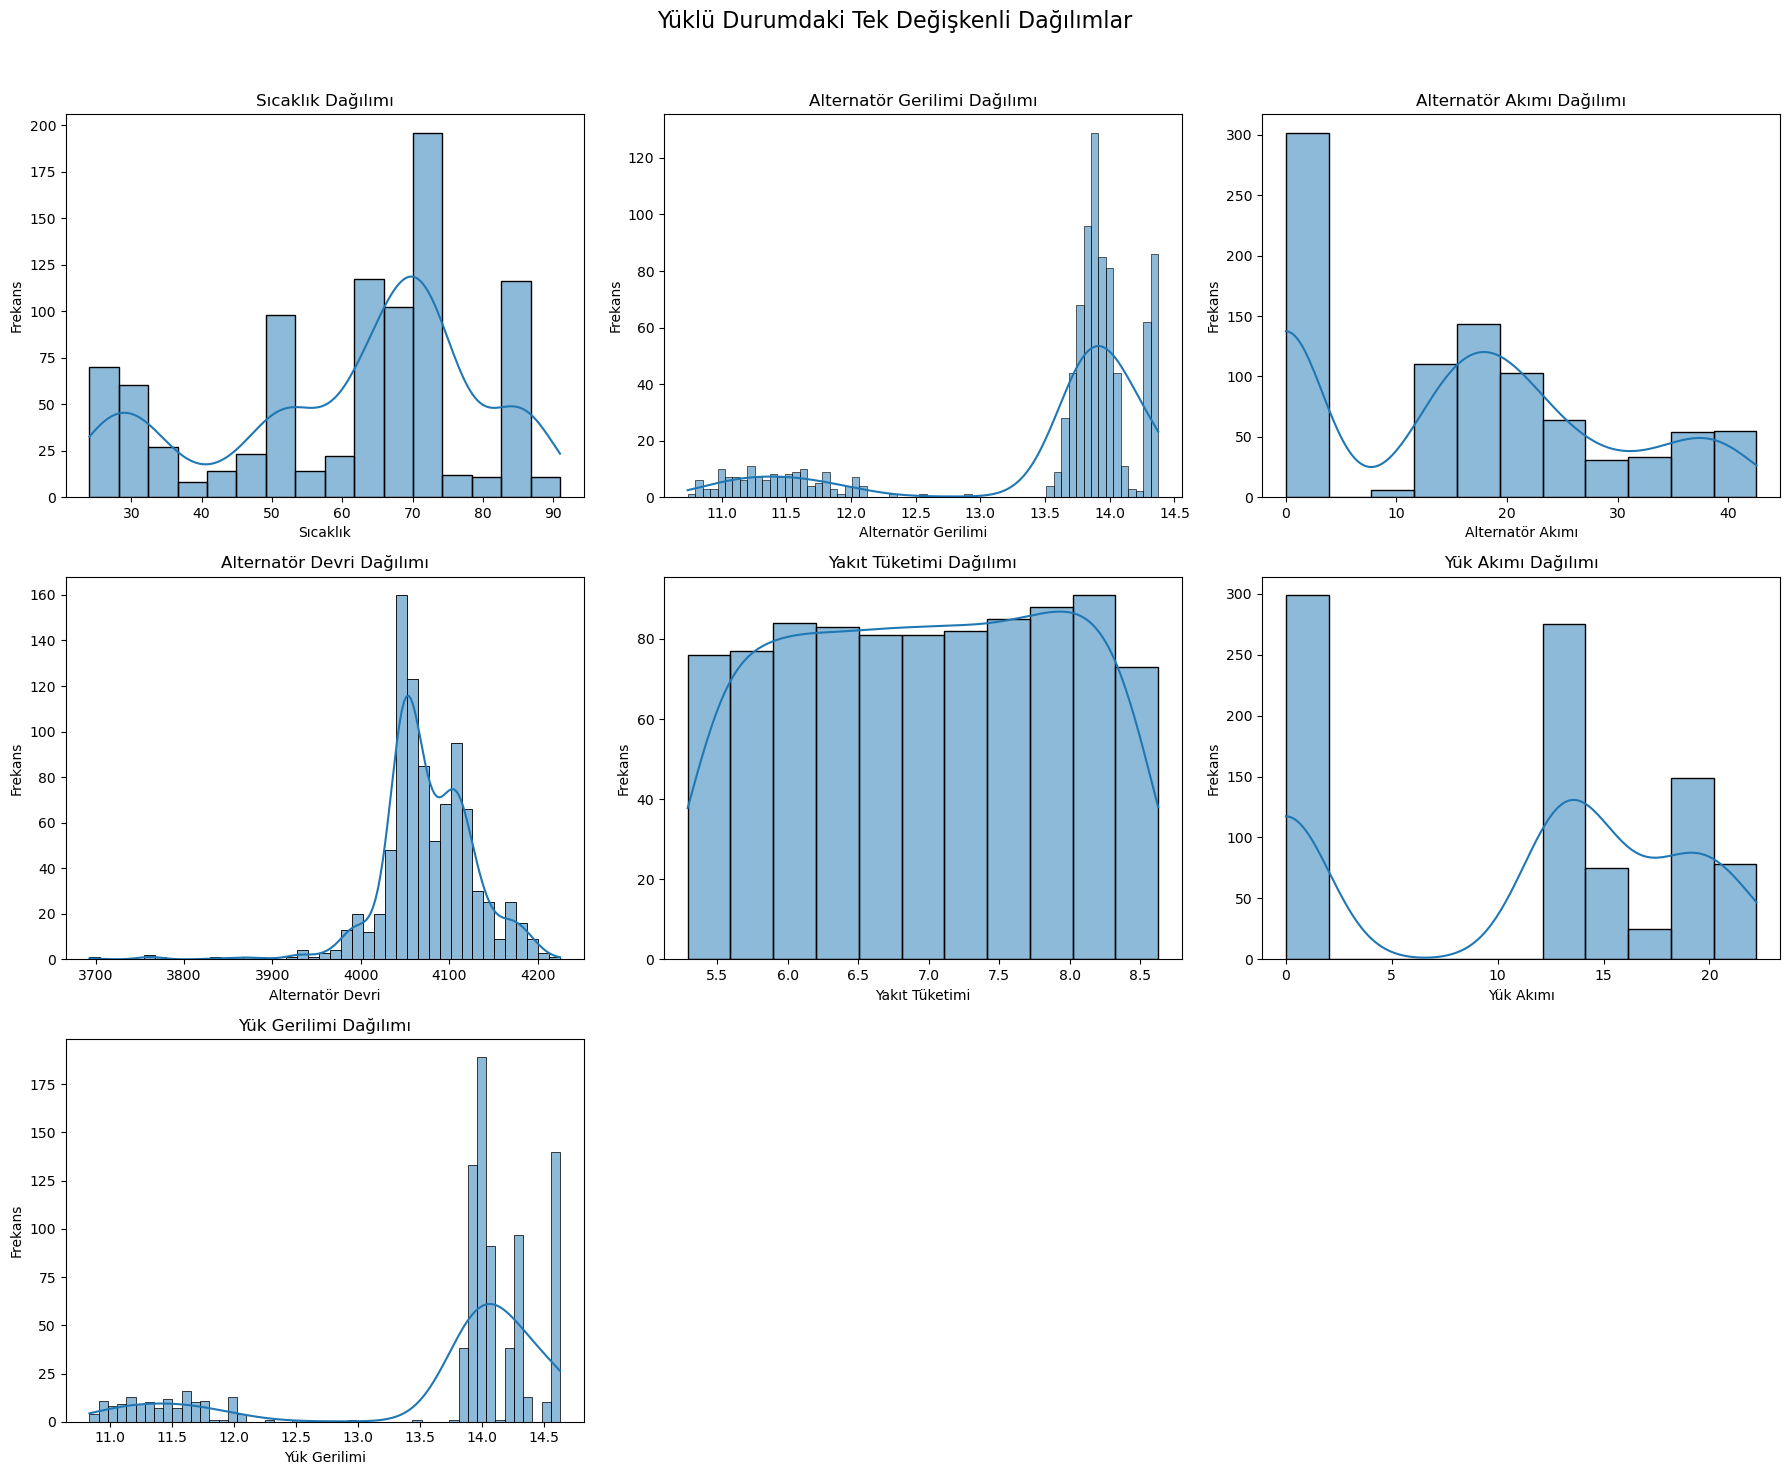

In [11]:
columns_to_plot = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 
                   'Alternatör Devri', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']


fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Yüklü Durumdaki Tek Değişkenli Dağılımlar', fontsize=16)

axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.histplot(df_yuklu[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column} Dağılımı')
    axes[i].set_ylabel('Frekans')

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

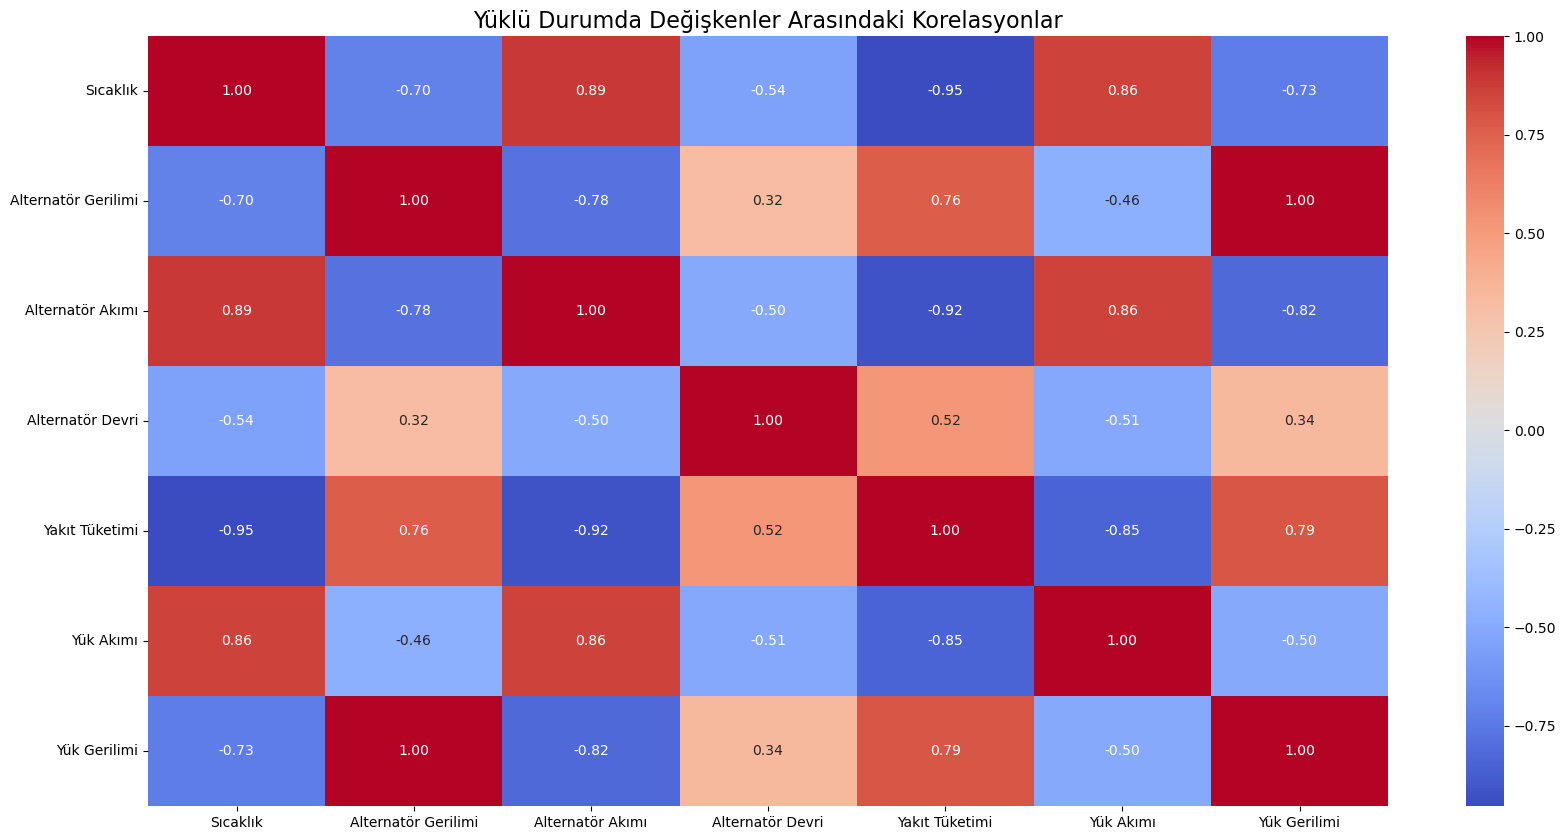

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df_yuklu.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Yüklü Durumda Değişkenler Arasındaki Korelasyonlar', fontsize=16)
plt.show()

### Yüksüz

In [13]:
df_yuksuz.head()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
0,30.936182,12.599808,0.000000,4108.703613,8.608044,0,12.599808
1,30.922311,12.599808,0.000000,4106.964111,8.591260,0,12.599808
2,31.110947,12.599808,21.209717,4132.186890,8.592480,0,12.599808
3,30.922311,12.599808,0.000000,4108.703613,8.560437,0,12.599808
4,30.950052,12.599808,0.000000,4112.182617,8.575696,0,12.599808


In [14]:
df_yuksuz.shape

(895, 7)

In [15]:
df_yuksuz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 900
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sıcaklık             895 non-null    float64
 1   Alternatör Gerilimi  895 non-null    float64
 2   Alternatör Akımı     895 non-null    float64
 3   Alternatör Devri     895 non-null    float64
 4   Yakıt Tüketimi       895 non-null    float64
 5   Yük Akımı            895 non-null    int64  
 6   Yük Gerilimi         895 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.9 KB


In [16]:
df_yuksuz.describe()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
count,895.000000,8.950000e+02,8.950000e+02,895.000000,8.950000e+02,895.0,8.950000e+02
mean,40.115305,1.259981e+01,1.600093e+00,2560.065840,7.022707e+00,0.0,1.259981e+01
std,2.987087,1.066410e-14,5.107897e+00,2219.638319,9.443394e-01,0.0,1.066410e-14
min,30.922311,1.259981e+01,0.000000e+00,0.000000,6.300000e-11,0.0,1.259981e+01
25%,38.792285,1.259981e+01,0.000000e+00,0.000000,6.261853e+00,0.0,1.259981e+01
50%,41.508078,1.259981e+01,0.000000e+00,4049.560547,7.031812e+00,0.0,1.259981e+01
75%,41.949152,1.259981e+01,3.410339e-14,4120.010376,7.795667e+00,0.0,1.259981e+01
max,49.708163,1.259981e+01,3.591919e+01,9567.260742,8.608044e+00,0.0,1.259981e+01


In [17]:
df_yuksuz.isnull().sum()

Sıcaklık               0
Alternatör Gerilimi    0
Alternatör Akımı       0
Alternatör Devri       0
Yakıt Tüketimi         0
Yük Akımı              0
Yük Gerilimi           0
dtype: int64

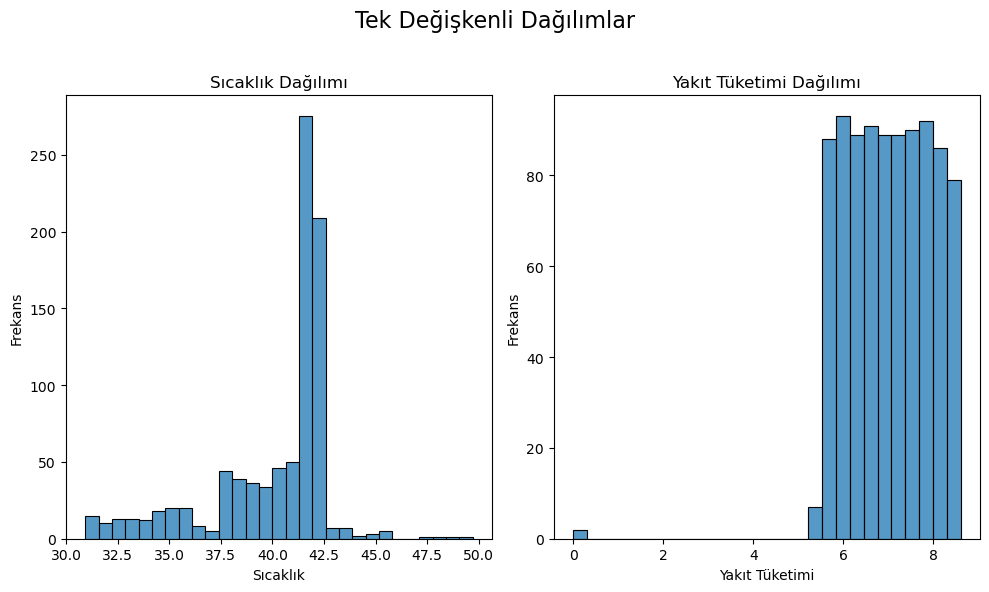

In [18]:
columns_to_plot = ['Sıcaklık', 'Yakıt Tüketimi']


fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Tek Değişkenli Dağılımlar', fontsize=16)

axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.histplot(df_yuksuz[column], ax=axes[i])
    axes[i].set_title(f'{column} Dağılımı')
    axes[i].set_ylabel('Frekans')

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

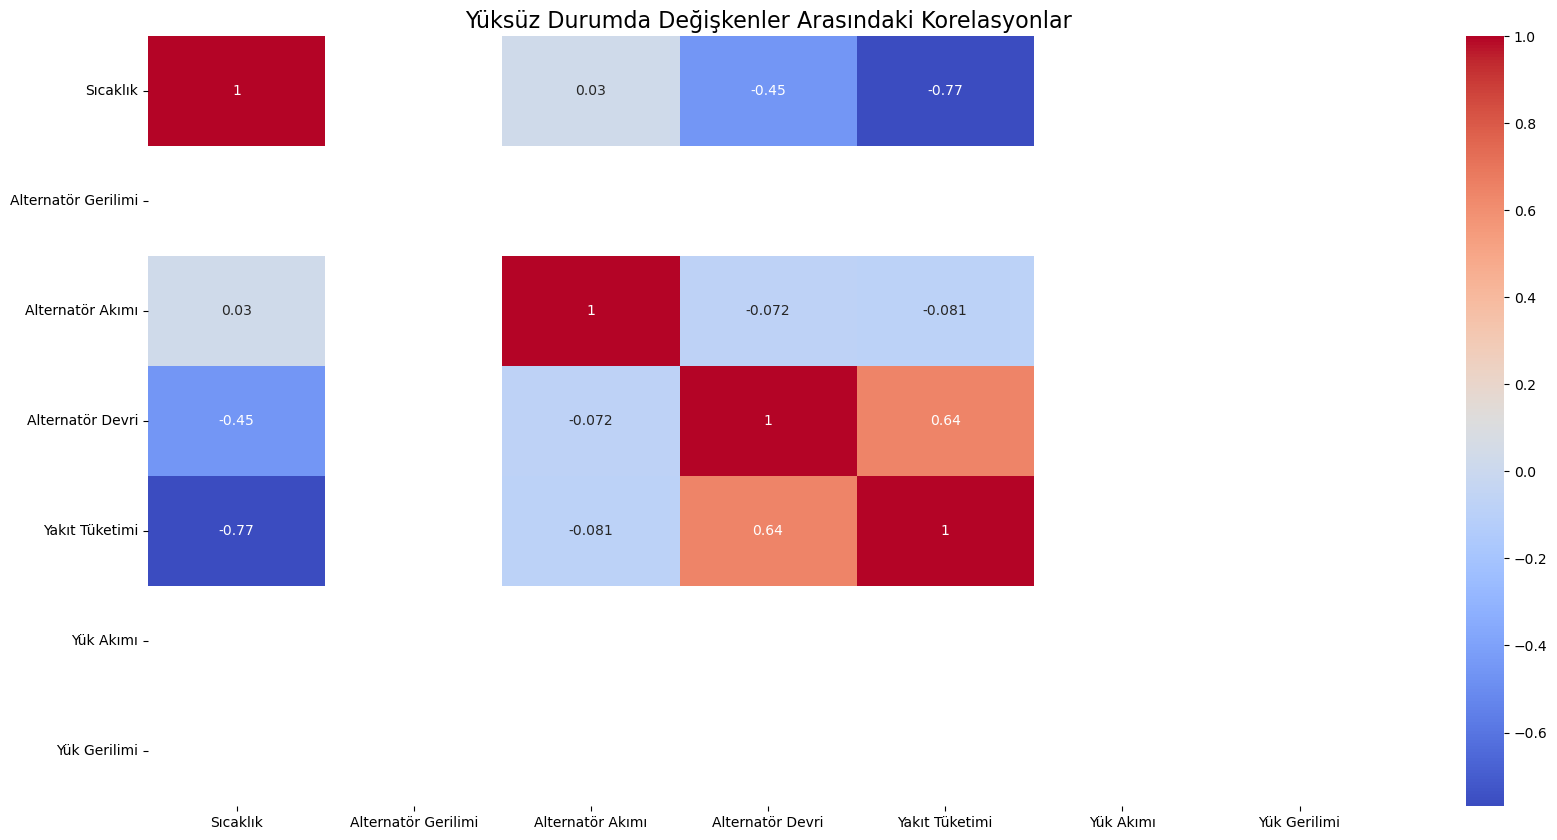

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df_yuksuz.corr(), annot=True, cmap='coolwarm')
plt.title('Yüksüz Durumda Değişkenler Arasındaki Korelasyonlar', fontsize=16)
plt.show()

In [20]:
df_yuksuz.corr()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
Sıcaklık,1.000000,NaN,0.030087,-0.454719,-0.769525,NaN,NaN
Alternatör Gerilimi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alternatör Akımı,0.030087,NaN,1.000000,-0.072171,-0.080883,NaN,NaN
Alternatör Devri,-0.454719,NaN,-0.072171,1.000000,0.642437,NaN,NaN
Yakıt Tüketimi,-0.769525,NaN,-0.080883,0.642437,1.000000,NaN,NaN
Yük Akımı,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yük Gerilimi,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Akü Şarj

In [21]:
df_aku.head()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
0,30.653229,14.155884,0.768585,4133.926392,8.456067,2.593994e-14,14.301147
1,30.575555,13.827209,0.444183,4062.606812,8.472546,0.000000e+00,13.980408
2,30.705936,13.731384,0.365906,4061.737061,8.482617,0.000000e+00,13.894043
3,30.855734,14.000854,0.440979,4053.039551,8.474683,1.068115e-14,14.166565
4,35.005710,14.132080,0.670929,4114.791870,8.430737,0.000000e+00,14.272156


In [22]:
df_aku.shape

(901, 7)

In [23]:
df_aku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sıcaklık             901 non-null    float64
 1   Alternatör Gerilimi  901 non-null    float64
 2   Alternatör Akımı     901 non-null    float64
 3   Alternatör Devri     901 non-null    float64
 4   Yakıt Tüketimi       901 non-null    float64
 5   Yük Akımı            901 non-null    float64
 6   Yük Gerilimi         901 non-null    float64
dtypes: float64(7)
memory usage: 49.4 KB


In [24]:
df_aku.describe()

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
count,901.000000,901.000000,901.000000,901.000000,901.000000,9.010000e+02,901.000000
mean,50.507690,13.926586,0.251401,2964.910611,6.855492,6.125532e-15,14.042570
std,4.048817,0.146382,0.252115,1998.245369,0.914187,1.441081e-14,0.130387
min,30.575555,13.158264,0.100220,0.000000,5.288953,0.000000e+00,13.632507
25%,50.201944,13.830566,0.127701,1130.676270,6.065015,0.000000e+00,13.965454
50%,51.694382,13.949280,0.148666,4059.997559,6.852673,0.000000e+00,14.059143
75%,52.484985,14.038086,0.177612,4111.312866,7.640332,7.629395e-15,14.141846
max,64.310751,14.468079,0.999603,9802.093506,8.482617,1.602173e-13,14.353027


In [25]:
df_aku.isnull().sum()   

Sıcaklık               0
Alternatör Gerilimi    0
Alternatör Akımı       0
Alternatör Devri       0
Yakıt Tüketimi         0
Yük Akımı              0
Yük Gerilimi           0
dtype: int64

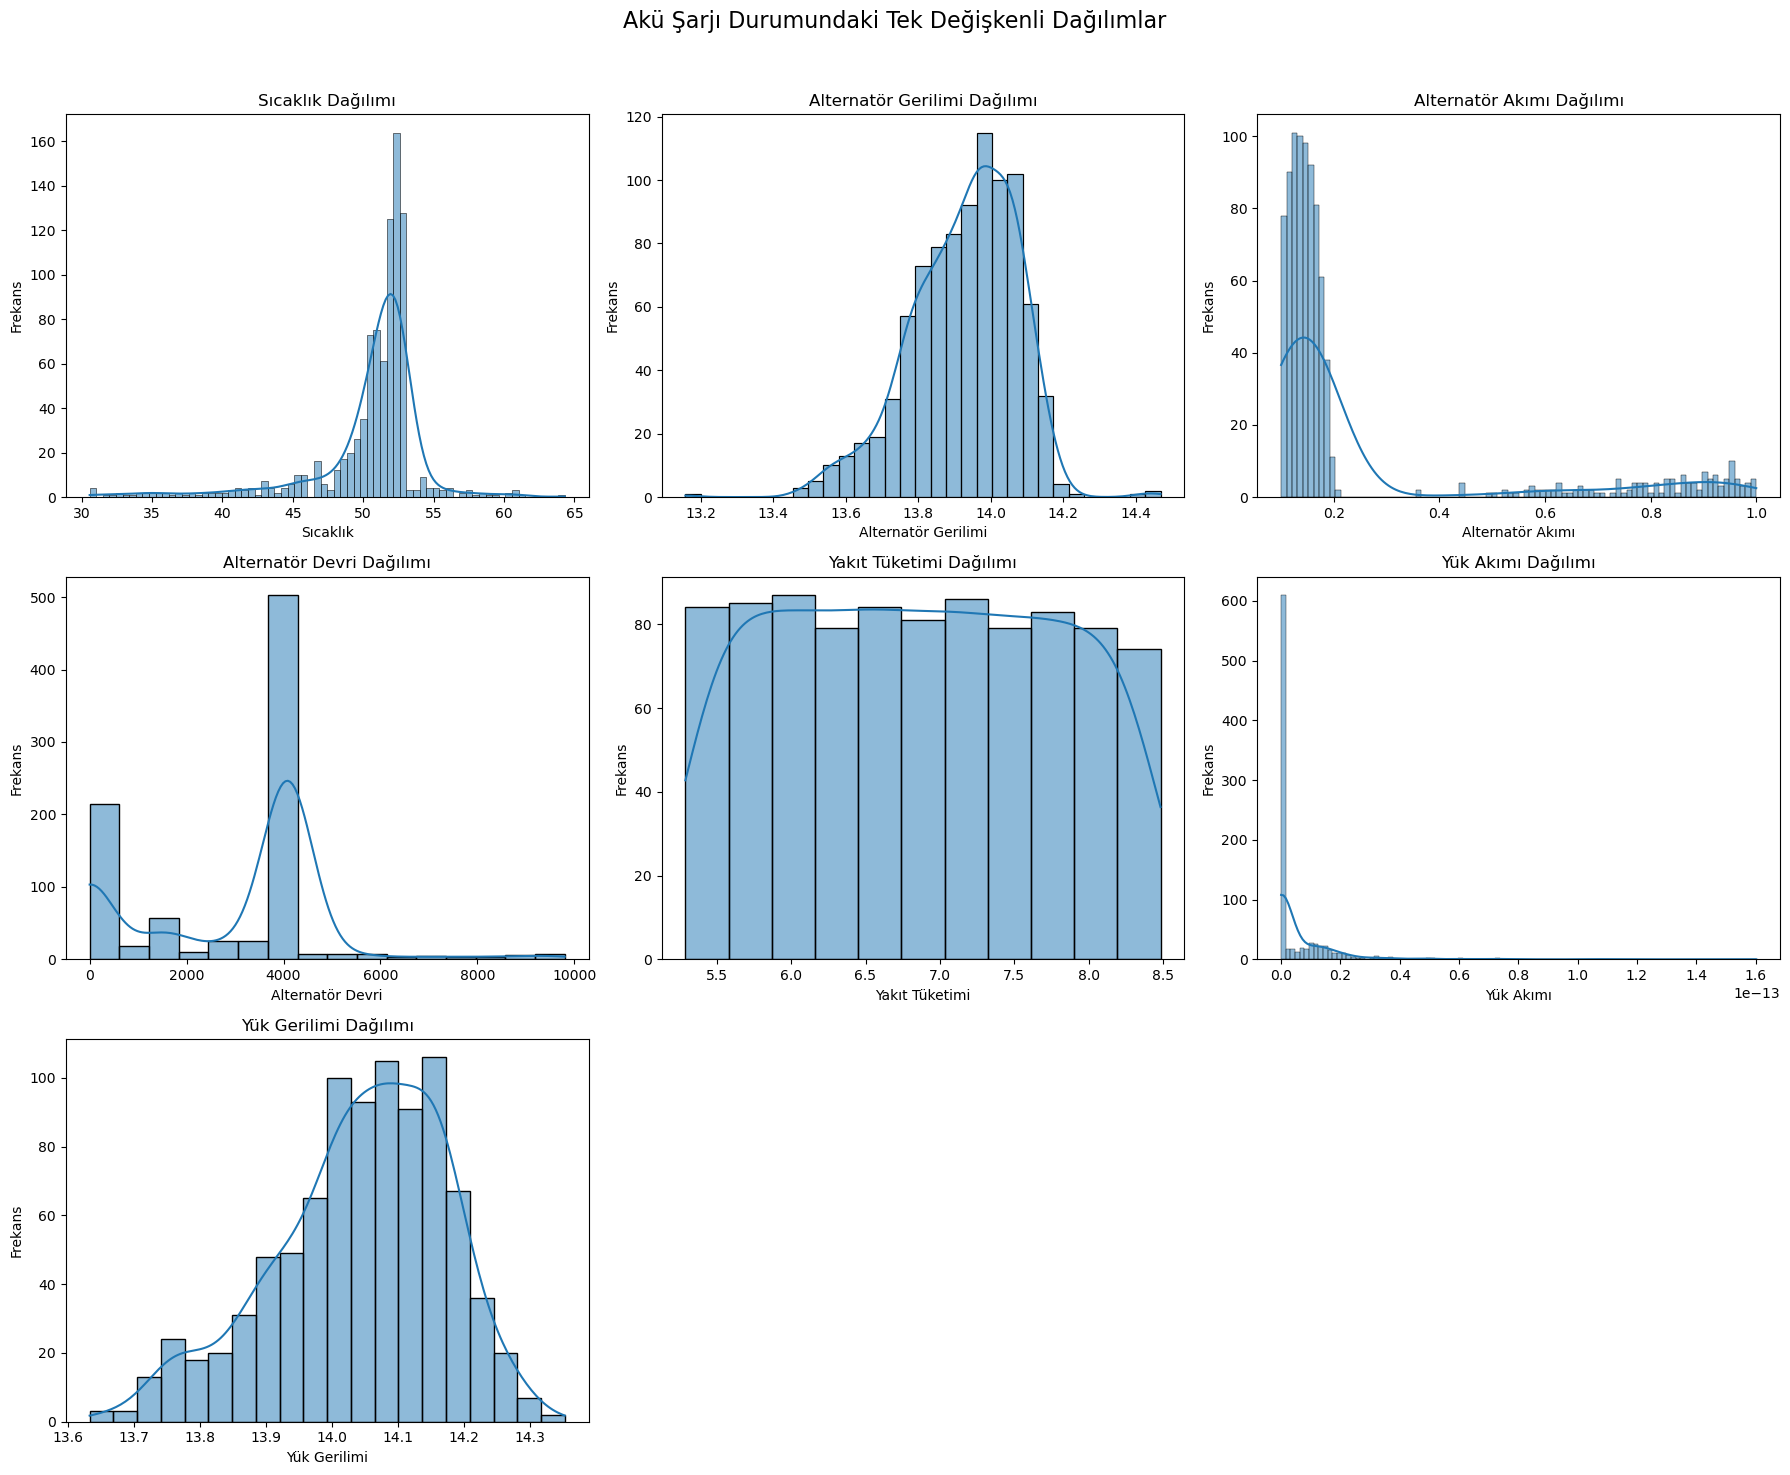

In [26]:
columns_to_plot = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 
                   'Alternatör Devri', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']


fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Akü Şarjı Durumundaki Tek Değişkenli Dağılımlar', fontsize=16)

axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.histplot(df_aku[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column} Dağılımı')
    axes[i].set_ylabel('Frekans')

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

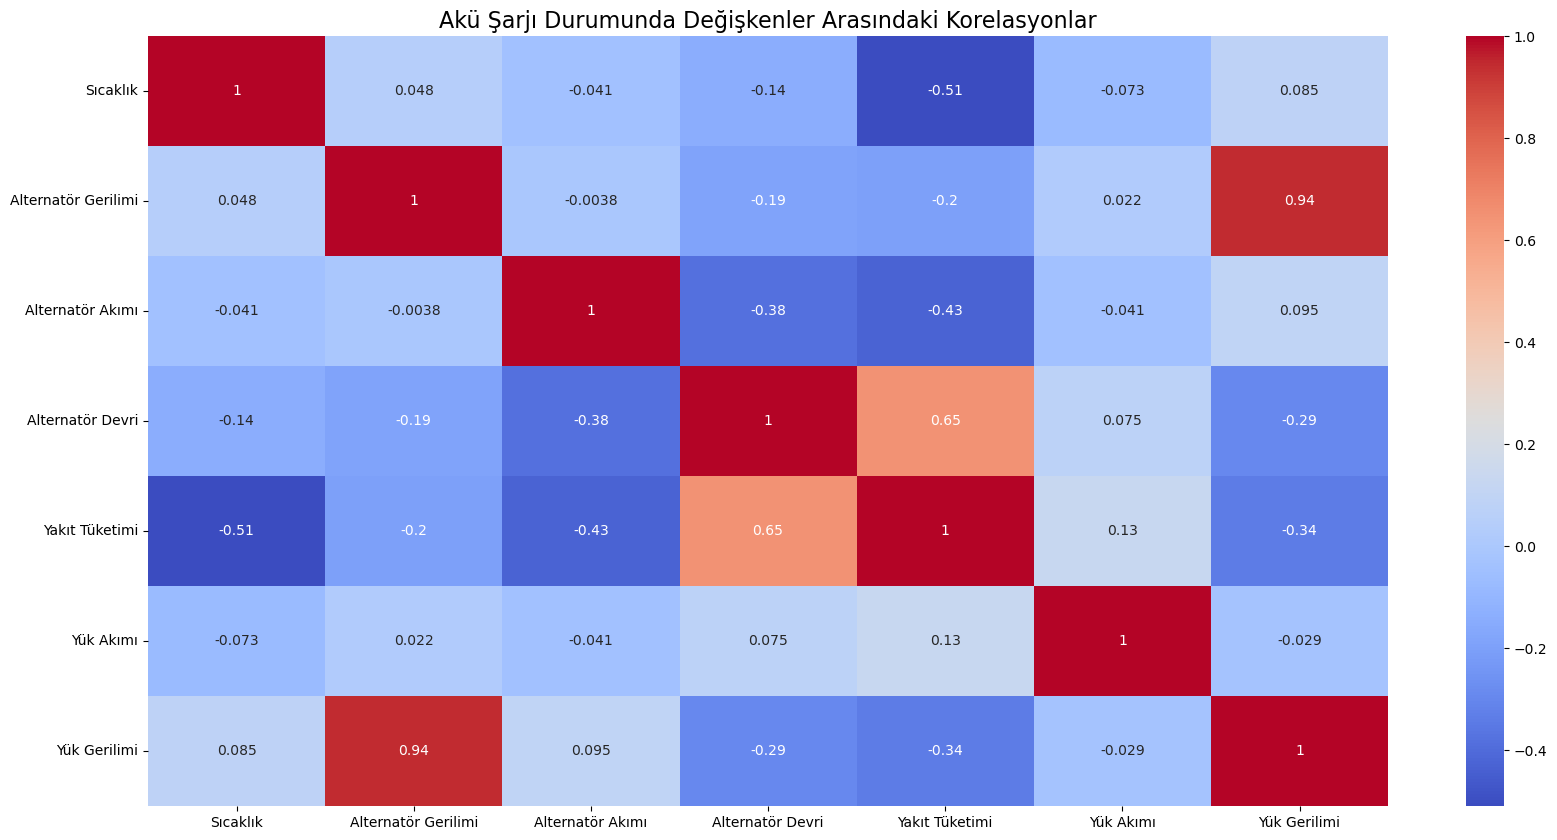

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df_aku.corr(), annot=True, cmap='coolwarm')
plt.title('Akü Şarjı Durumunda Değişkenler Arasındaki Korelasyonlar', fontsize=16)
plt.show()

## Karşılaştırmalı Veri Analizi

In [28]:
consistent_columns = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 
                      'Alternatör Devir', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

df_yuklu.columns = consistent_columns
df_yuksuz.columns = consistent_columns
df_aku.columns = consistent_columns

In [29]:
df_yuklu['Durum'] = 'Yuklu'
df_yuksuz['Durum'] = 'Yuksuz'
df_aku['Durum'] = 'Aku'

In [30]:
df = pd.concat([df_yuklu, df_yuksuz, df_aku], ignore_index=True)

In [31]:
df.sample(5)

,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devir,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi,Durum
1206,40.184857,12.599808,0.000000,4109.573364,7.499036,0.000000e+00,12.599808,Yuksuz
1335,41.305573,12.599808,0.000000,2150.894165,7.069043,0.000000e+00,12.599808,Yuksuz
1037,37.466290,12.599808,0.000000,4123.489380,8.076123,0.000000e+00,12.599808,Yuksuz
2590,50.712369,14.069214,0.103317,0.000000,5.631665,1.831055e-14,14.194336,Aku
2443,52.038364,14.111328,0.139709,1078.491211,6.192883,0.000000e+00,14.210510,Aku


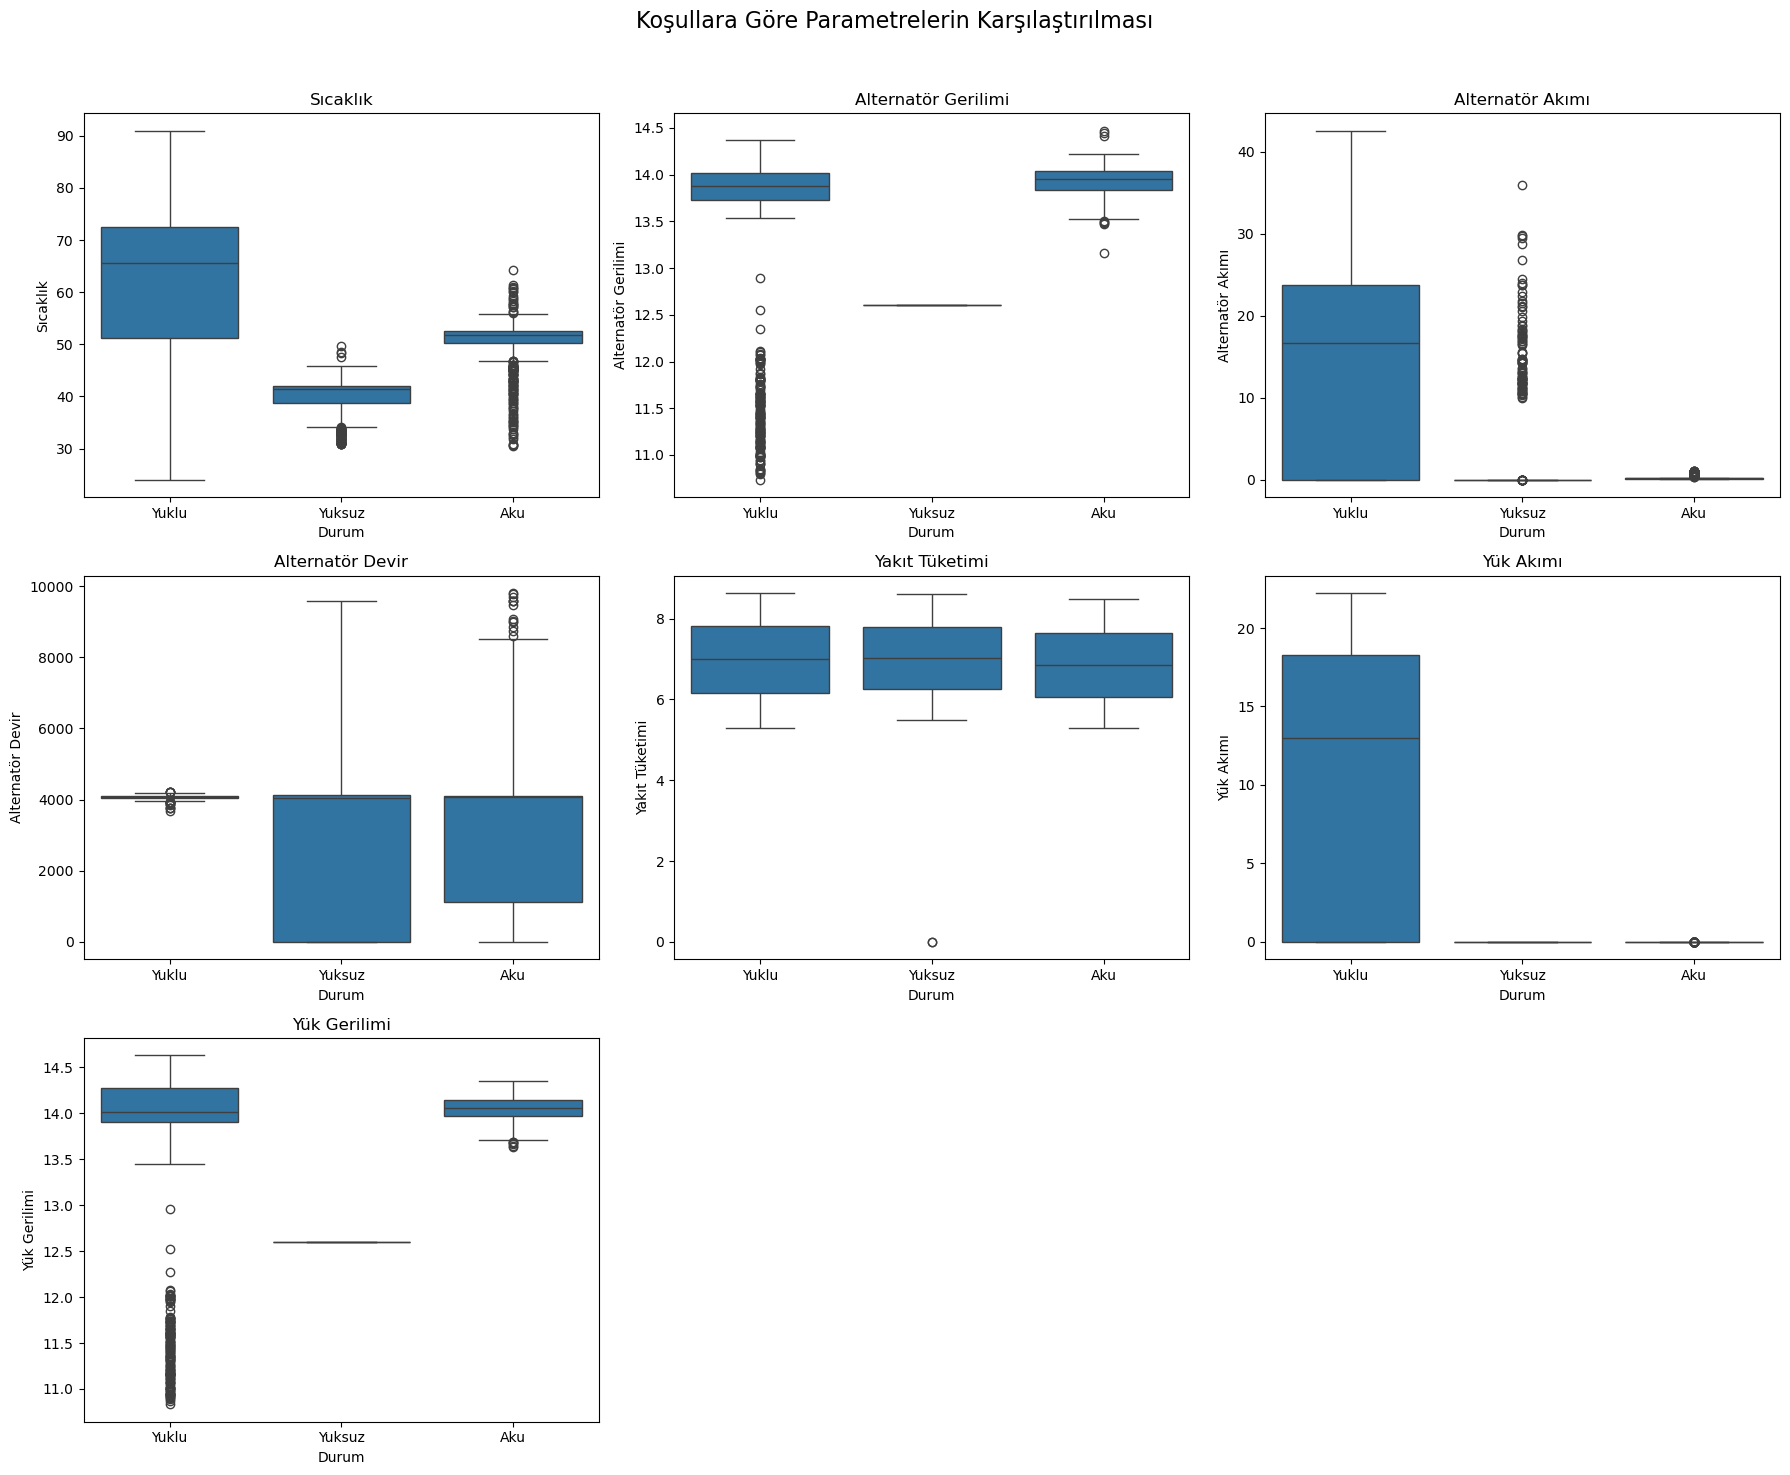

In [32]:
columns_to_plot = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 
                   'Alternatör Devir', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']


fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Koşullara Göre Parametrelerin Karşılaştırılması', fontsize=16)

axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, x='Durum', y=column, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Durum')
    axes[i].set_ylabel(column)

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

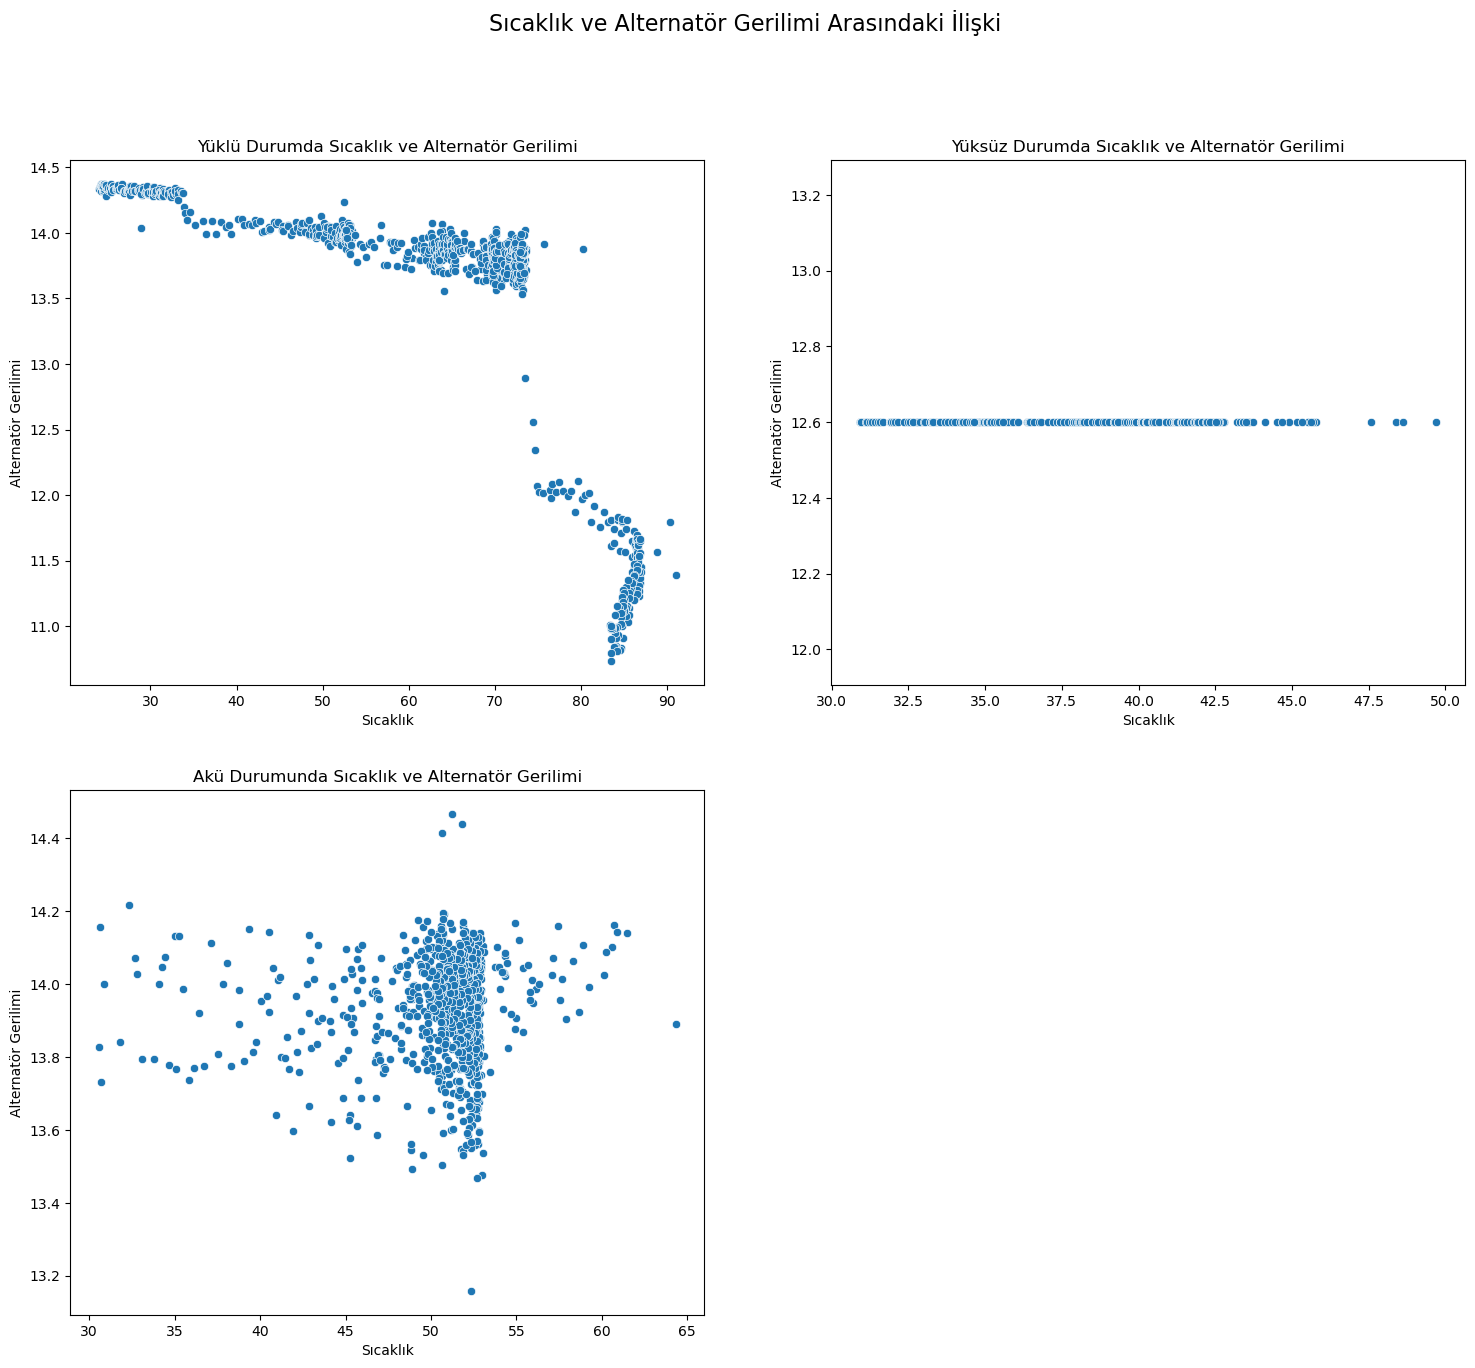

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Sıcaklık ve Alternatör Gerilimi Arasındaki İlişki', fontsize=16)


sns.scatterplot(data=df_yuklu, x="Sıcaklık", y="Alternatör Gerilimi",ax=axes[0, 0])
axes[0, 0].set_title('Yüklü Durumda Sıcaklık ve Alternatör Gerilimi')
axes[0, 0].set_xlabel('Sıcaklık')
axes[0, 0].set_ylabel('Alternatör Gerilimi')

sns.scatterplot(data=df_yuksuz, x="Sıcaklık", y="Alternatör Gerilimi",ax=axes[0, 1])
axes[0, 1].set_title('Yüksüz Durumda Sıcaklık ve Alternatör Gerilimi')
axes[0, 1].set_xlabel('Sıcaklık')
axes[0, 1].set_ylabel('Alternatör Gerilimi')

sns.scatterplot(data=df_aku, x="Sıcaklık", y="Alternatör Gerilimi",ax=axes[1, 0])
axes[1, 0].set_title('Akü Durumunda Sıcaklık ve Alternatör Gerilimi')
axes[1, 0].set_xlabel('Sıcaklık')
axes[1, 0].set_ylabel('Alternatör Gerilimi')

axes[1,1].axis('off');


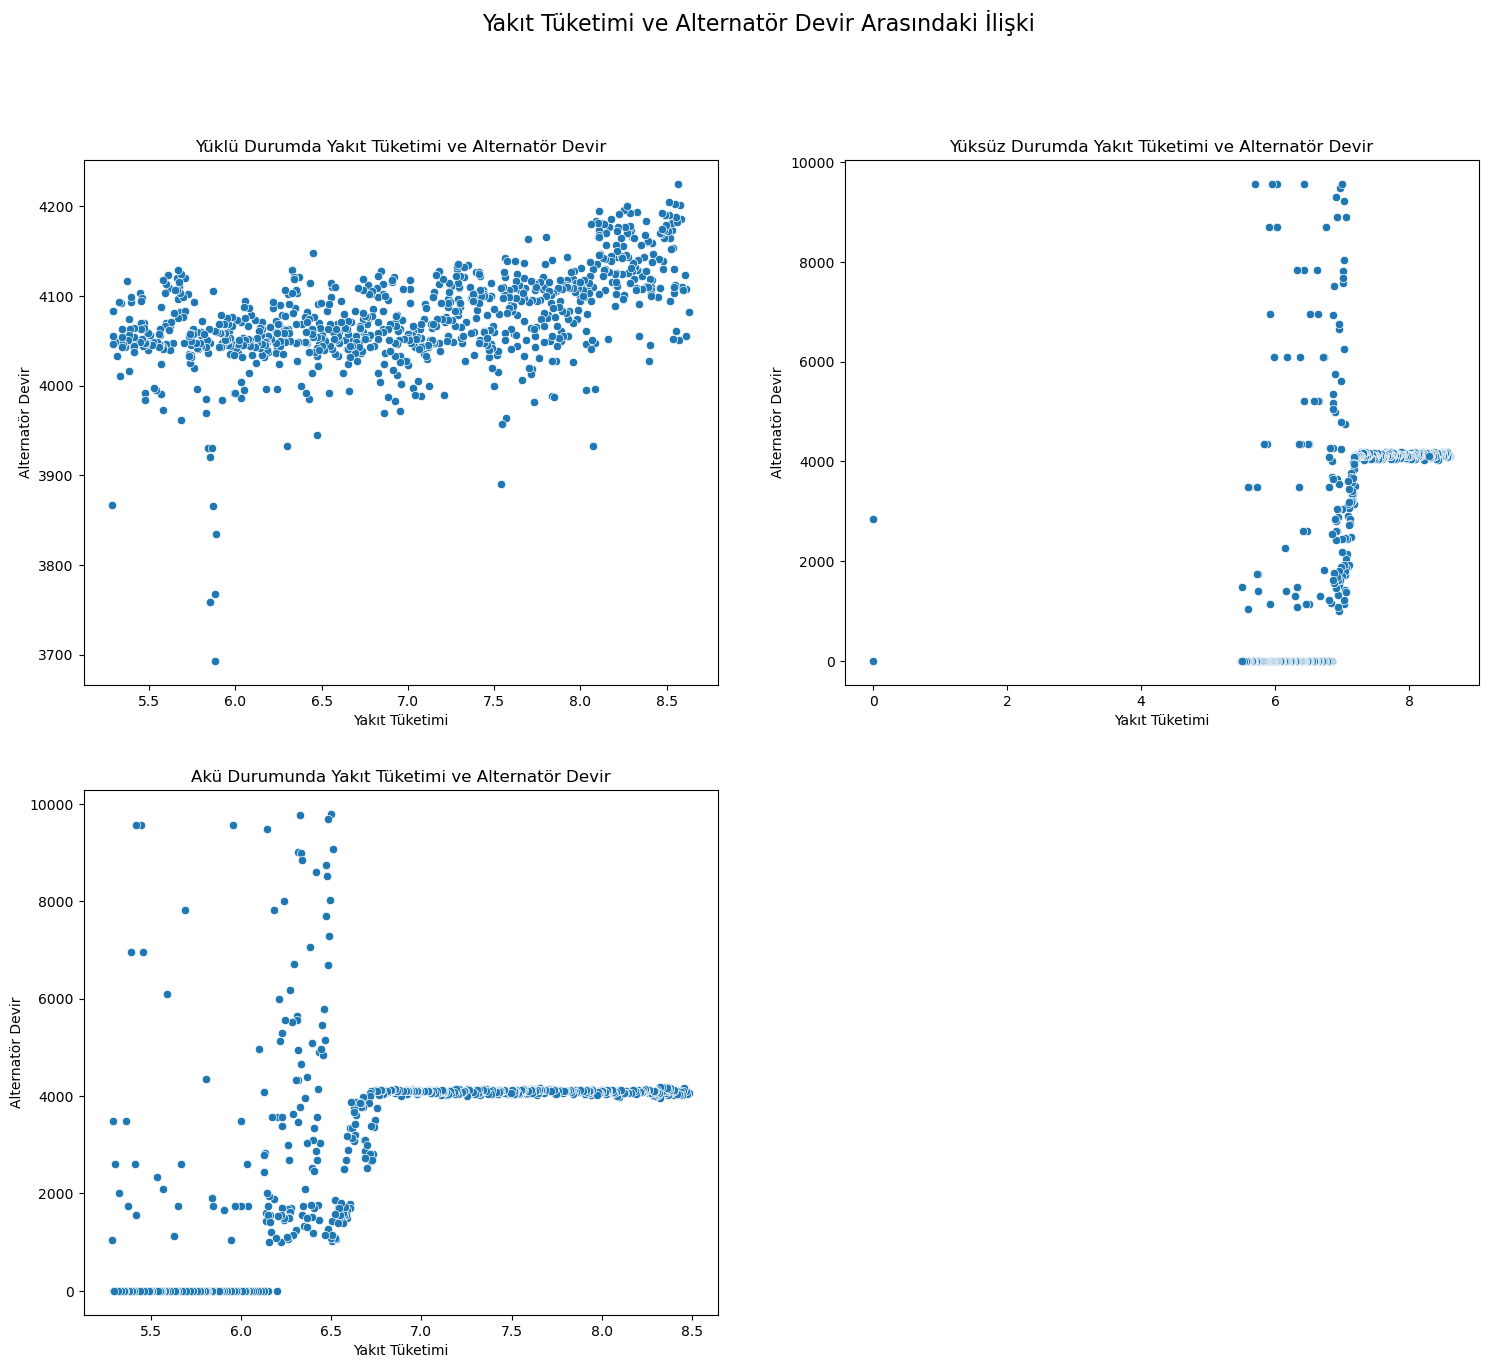

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Yakıt Tüketimi ve Alternatör Devir Arasındaki İlişki', fontsize=16)


sns.scatterplot(data=df_yuklu, x="Yakıt Tüketimi", y="Alternatör Devir",ax=axes[0, 0])
axes[0, 0].set_title('Yüklü Durumda Yakıt Tüketimi ve Alternatör Devir')
axes[0, 0].set_xlabel('Yakıt Tüketimi')
axes[0, 0].set_ylabel('Alternatör Devir')

sns.scatterplot(data=df_yuksuz, x="Yakıt Tüketimi", y="Alternatör Devir",ax=axes[0, 1])
axes[0, 1].set_title('Yüksüz Durumda Yakıt Tüketimi ve Alternatör Devir')
axes[0, 1].set_xlabel('Yakıt Tüketimi')
axes[0, 1].set_ylabel('Alternatör Devir')

sns.scatterplot(data=df_aku, x="Yakıt Tüketimi", y="Alternatör Devir",ax=axes[1, 0])
axes[1, 0].set_title('Akü Durumunda Yakıt Tüketimi ve Alternatör Devir')
axes[1, 0].set_xlabel('Yakıt Tüketimi')
axes[1, 0].set_ylabel('Alternatör Devir')

axes[1,1].axis('off');


### ANNOVA

ANOVA (Analysis of Variance), veri biliminde birden fazla grup veya kategori arasındaki ortalama farklılıklarını test etmek için kullanılan istatistiksel bir yöntemdir. ANOVA, özellikle aşağıdaki durumlarda kullanılır:

    Birden Fazla Grup Karşılaştırması: İki veya daha fazla grubun ortalamalarını karşılaştırmak için kullanılır. Örneğin, üç farklı eğitim yönteminin öğrencilerin başarıları üzerindeki etkisini incelemek.

    Varyans Analizi: Gruplar arasındaki varyansın, gruplar içindeki varyansa göre anlamlı bir şekilde farklı olup olmadığını değerlendirir.

    Hipotez Testi: Genellikle sıfır hipotezi (H0) "gruplar arasında anlamlı bir fark yoktur" şeklindedir. Alternatif hipotez (H1) ise "en az bir grup diğerlerinden farklıdır" şeklindedir.



In [35]:
from scipy.stats import ttest_ind, f_oneway

results = {}
for column in columns_to_plot:
    stat, _= f_oneway(df_yuklu[column], df_yuksuz[column], df_aku[column])
    results[column] = {'F-statistic': stat}


anova_results_df = pd.DataFrame(results).T
print("ANOVA Results:")
print(anova_results_df)

ANOVA Results:
                     F-statistic
Sıcaklık              821.748908
Alternatör Gerilimi  1310.316139
Alternatör Akımı      969.016104
Alternatör Devir      186.289477
Yakıt Tüketimi          7.685740
Yük Akımı            1615.207189
Yük Gerilimi         1392.067913


### Yüklü ve Yüksüz Hipotez Testi

In [36]:
p_results = {}
for column in columns_to_plot:
    _, p = f_oneway(df_yuklu[column], df_yuksuz[column])
    p_results[column] = {'p-value': p}

p_value_df = pd.DataFrame(p_results).T
print("P Value Results:")
print(p_value_df)

P Value Results:
                           p-value
Sıcaklık             8.528807e-195
Alternatör Gerilimi  1.935347e-154
Alternatör Akımı     9.087735e-157
Alternatör Devir      5.757461e-84
Yakıt Tüketimi        3.165100e-01
Yük Akımı            8.774721e-252
Yük Gerilimi         3.113223e-177


In [37]:
alpha = 0.05  # anlamlılık seviyesi

for column, result in p_results.items():
    if result['p-value'] < alpha:
        print(f"{column} için p-değeri = {result['p-value']} < {alpha}. Sıfır hipotezini reddedin; anlamlı bir fark var.")
    else:
        print(f"{column} için p-değeri = {result['p-value']} >= {alpha}. Sıfır hipotezini reddetmeyin; anlamlı bir fark yok.")

Sıcaklık için p-değeri = 8.528807264926529e-195 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Gerilimi için p-değeri = 1.935347086434558e-154 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Akımı için p-değeri = 9.087735371742287e-157 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Devir için p-değeri = 5.757461498945959e-84 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yakıt Tüketimi için p-değeri = 0.316510015469201 >= 0.05. Sıfır hipotezini reddetmeyin; anlamlı bir fark yok.
Yük Akımı için p-değeri = 8.77472123347876e-252 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yük Gerilimi için p-değeri = 3.113222860603271e-177 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.


### Yüklü - Akü Hipotez Testi

In [38]:
p_results = {}
for column in columns_to_plot:
    _, p = f_oneway(df_yuklu[column], df_aku[column])
    p_results[column] = {'p-value': p}

p_value_df = pd.DataFrame(p_results).T
print("P Value Results:")
print(p_value_df)

P Value Results:
                           p-value
Sıcaklık              1.027644e-59
Alternatör Gerilimi   2.583914e-30
Alternatör Akımı     1.437076e-203
Alternatör Devir      3.774213e-58
Yakıt Tüketimi        5.358740e-03
Yük Akımı            3.080047e-253
Yük Gerilimi          5.578783e-21


In [39]:
alpha = 0.05  # anlamlılık seviyesi

for column, result in p_results.items():
    if result['p-value'] < alpha:
        print(f"{column} için p-değeri = {result['p-value']} < {alpha}. Sıfır hipotezini reddedin; anlamlı bir fark var.")
    else:
        print(f"{column} için p-değeri = {result['p-value']} >= {alpha}. Sıfır hipotezini reddetmeyin; anlamlı bir fark yok.")

Sıcaklık için p-değeri = 1.027643907931544e-59 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Gerilimi için p-değeri = 2.5839141264278368e-30 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Akımı için p-değeri = 1.4370764183389362e-203 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Devir için p-değeri = 3.774212937223693e-58 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yakıt Tüketimi için p-değeri = 0.0053587398294876205 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yük Akımı için p-değeri = 3.08004716972655e-253 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yük Gerilimi için p-değeri = 5.578783489960824e-21 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.


### Yuksuz-Akü Hipotez Testi

In [40]:
p_results = {}
for column in columns_to_plot:
    _, p = f_oneway(df_yuksuz[column], df_aku[column])
    p_results[column] = {'p-value': p}

p_value_df = pd.DataFrame(p_results).T
print("P Value Results:")
print(p_value_df)

P Value Results:
                          p-value
Sıcaklık             0.000000e+00
Alternatör Gerilimi  0.000000e+00
Alternatör Akımı     4.261340e-15
Alternatör Devir     5.058306e-05
Yakıt Tüketimi       1.421505e-04
Yük Akımı            1.558112e-35
Yük Gerilimi         0.000000e+00


In [41]:
alpha = 0.05  # anlamlılık seviyesi

for column, result in p_results.items():
    if result['p-value'] < alpha:
        print(f"{column} için p-değeri = {result['p-value']} < {alpha}. Sıfır hipotezini reddedin; anlamlı bir fark var.")
    else:
        print(f"{column} için p-değeri = {result['p-value']} >= {alpha}. Sıfır hipotezini reddetmeyin; anlamlı bir fark yok.")

Sıcaklık için p-değeri = 0.0 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Gerilimi için p-değeri = 0.0 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Akımı için p-değeri = 4.26133984901178e-15 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Alternatör Devir için p-değeri = 5.058306466465351e-05 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yakıt Tüketimi için p-değeri = 0.00014215049901054224 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yük Akımı için p-değeri = 1.5581115808293913e-35 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.
Yük Gerilimi için p-değeri = 0.0 < 0.05. Sıfır hipotezini reddedin; anlamlı bir fark var.


## Makine Öğrenmesi

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []

        
        result=pd.DataFrame(columns=['Algorithm','R_Squared','RMSE'])
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)


            

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.Algorithm=algo_names
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

### Mutual Information

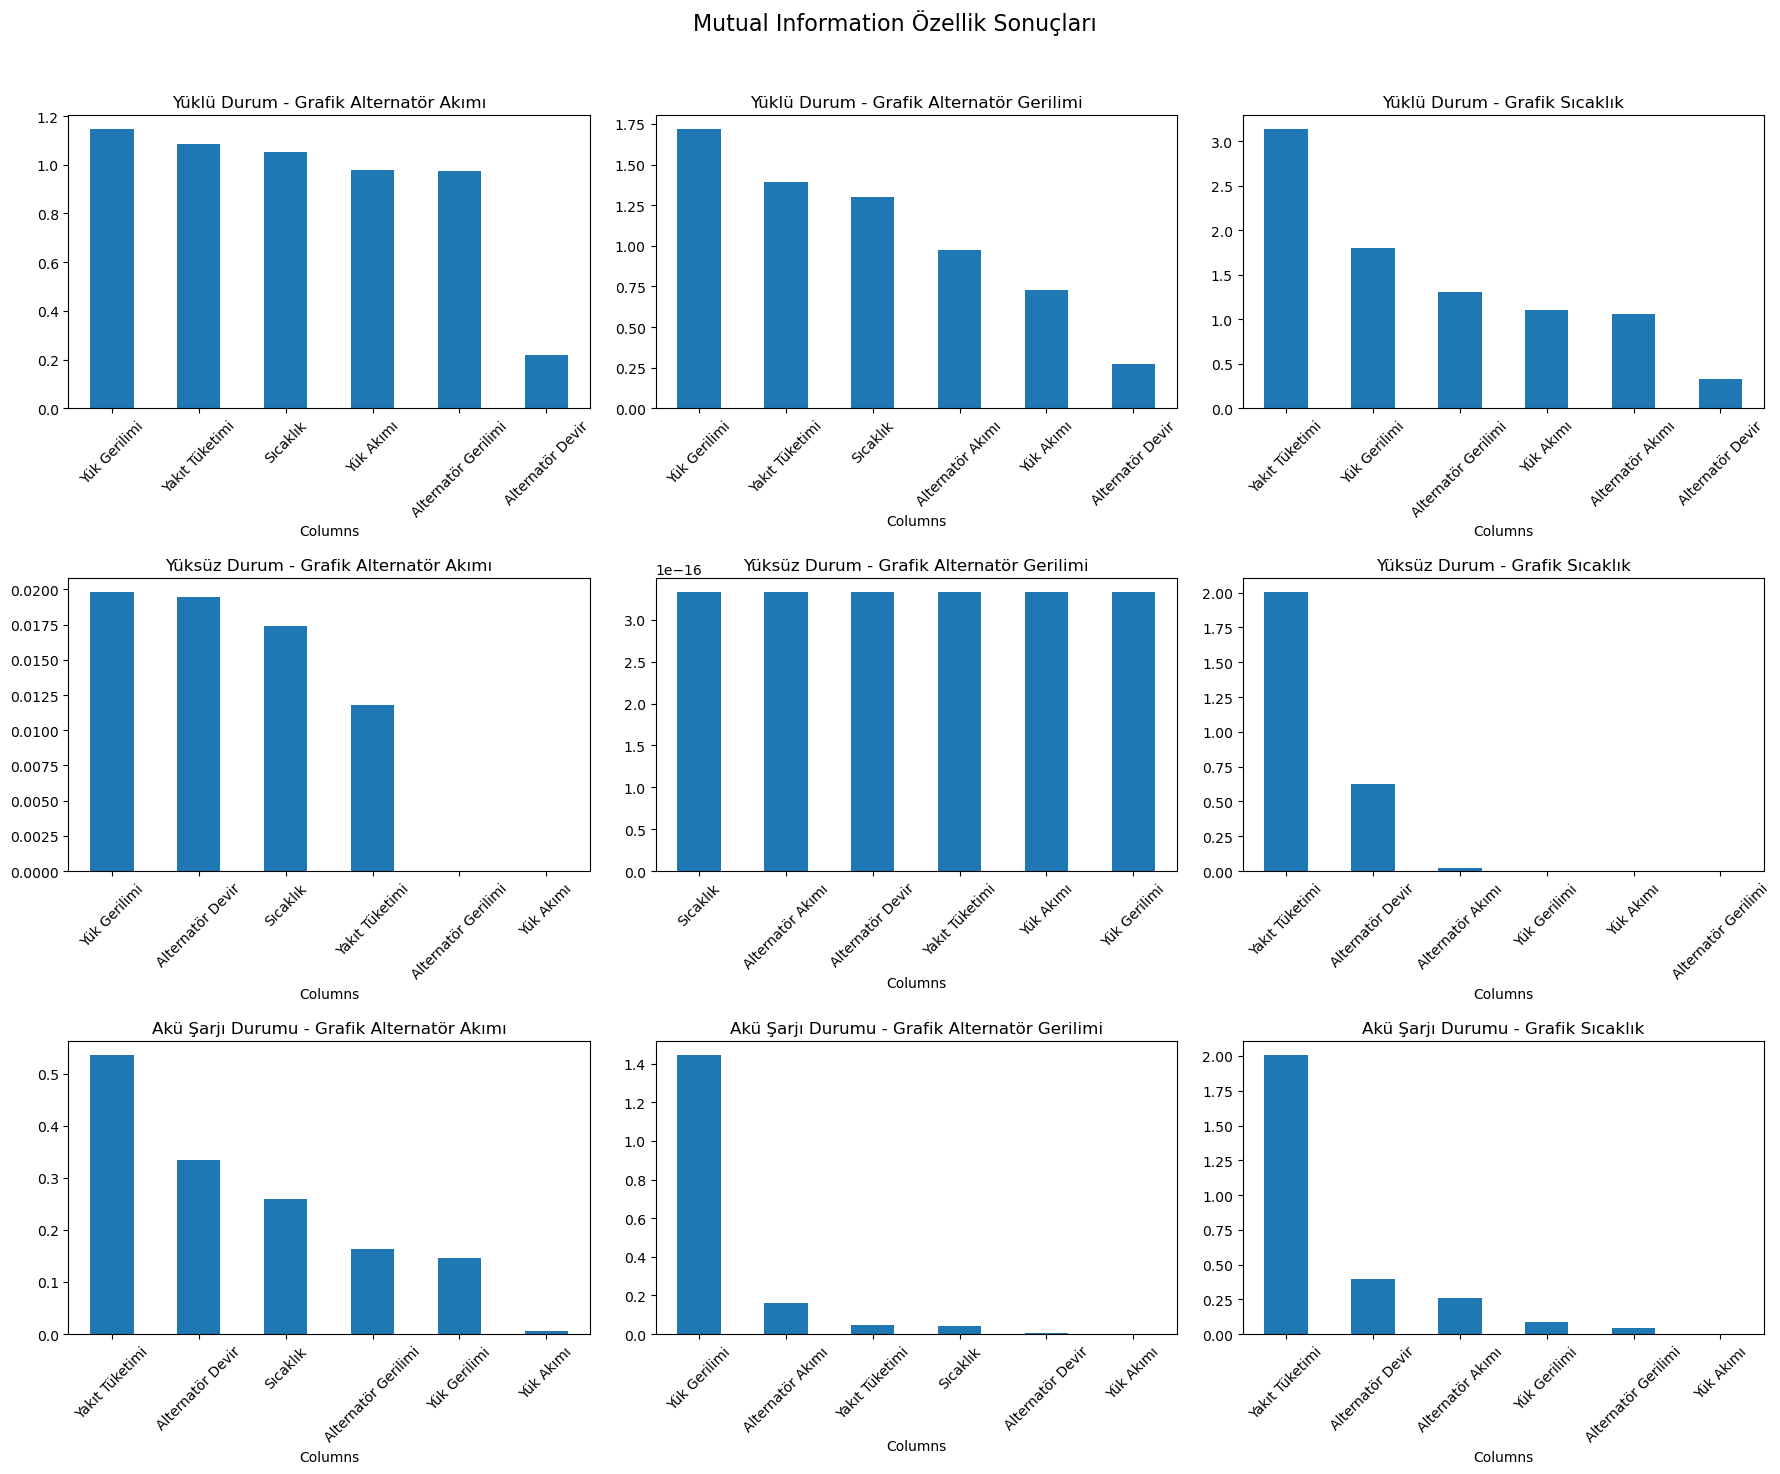

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

def mutual_info(datas):
    scores = {}
    for name, data in datas.items():
        x_al_akım = data.drop(['Alternatör Akımı', 'Durum'], axis=1)
        y_al_akım = data['Alternatör Akımı']

        x_al_gerilimi = data.drop(['Alternatör Gerilimi', 'Durum'], axis=1)
        y_al_gerilimi = data['Alternatör Gerilimi']

        x_sıcaklık = data.drop(['Sıcaklık', 'Durum'], axis=1)
        y_sıcaklık = data['Sıcaklık']

        mi_scores = []

        mi_scores_al_akım = mutual_info_regression(x_al_akım, y_al_akım)
        mi_scores_al_akım = pd.DataFrame({'Columns': x_al_akım.columns, 'MI Scores': mi_scores_al_akım}).sort_values('MI Scores', ascending=False)
        mi_scores.append(mi_scores_al_akım)

        mi_scores_al_gerilim = mutual_info_regression(x_al_gerilimi, y_al_gerilimi)
        mi_scores_al_gerilim = pd.DataFrame({'Columns': x_al_gerilimi.columns, 'MI Scores': mi_scores_al_gerilim}).sort_values('MI Scores', ascending=False)
        mi_scores.append(mi_scores_al_gerilim)

        mi_scores_sıcaklık = mutual_info_regression(x_sıcaklık, y_sıcaklık)
        mi_scores_sıcaklık = pd.DataFrame({'Columns': x_sıcaklık.columns, 'MI Scores': mi_scores_sıcaklık}).sort_values('MI Scores', ascending=False)
        mi_scores.append(mi_scores_sıcaklık)

        scores[name] = mi_scores

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('Mutual Information Özellik Sonuçları', fontsize=16)

    params = ['Alternatör Akımı', 'Alternatör Gerilimi', 'Sıcaklık']
    for i, (name, mi_scores) in enumerate(scores.items()):
        for j, score in enumerate(mi_scores):
            ax = axes[i, j]
            score.plot.bar(x='Columns', y='MI Scores', ax=ax, legend=False)
            ax.set_title(f"{name} - Grafik {params[j]}")
            ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
datas = { 
    'Yüklü Durum': df_yuklu,
    'Yüksüz Durum': df_yuksuz,
    'Akü Şarjı Durumu': df_aku
}

mutual_info(datas)


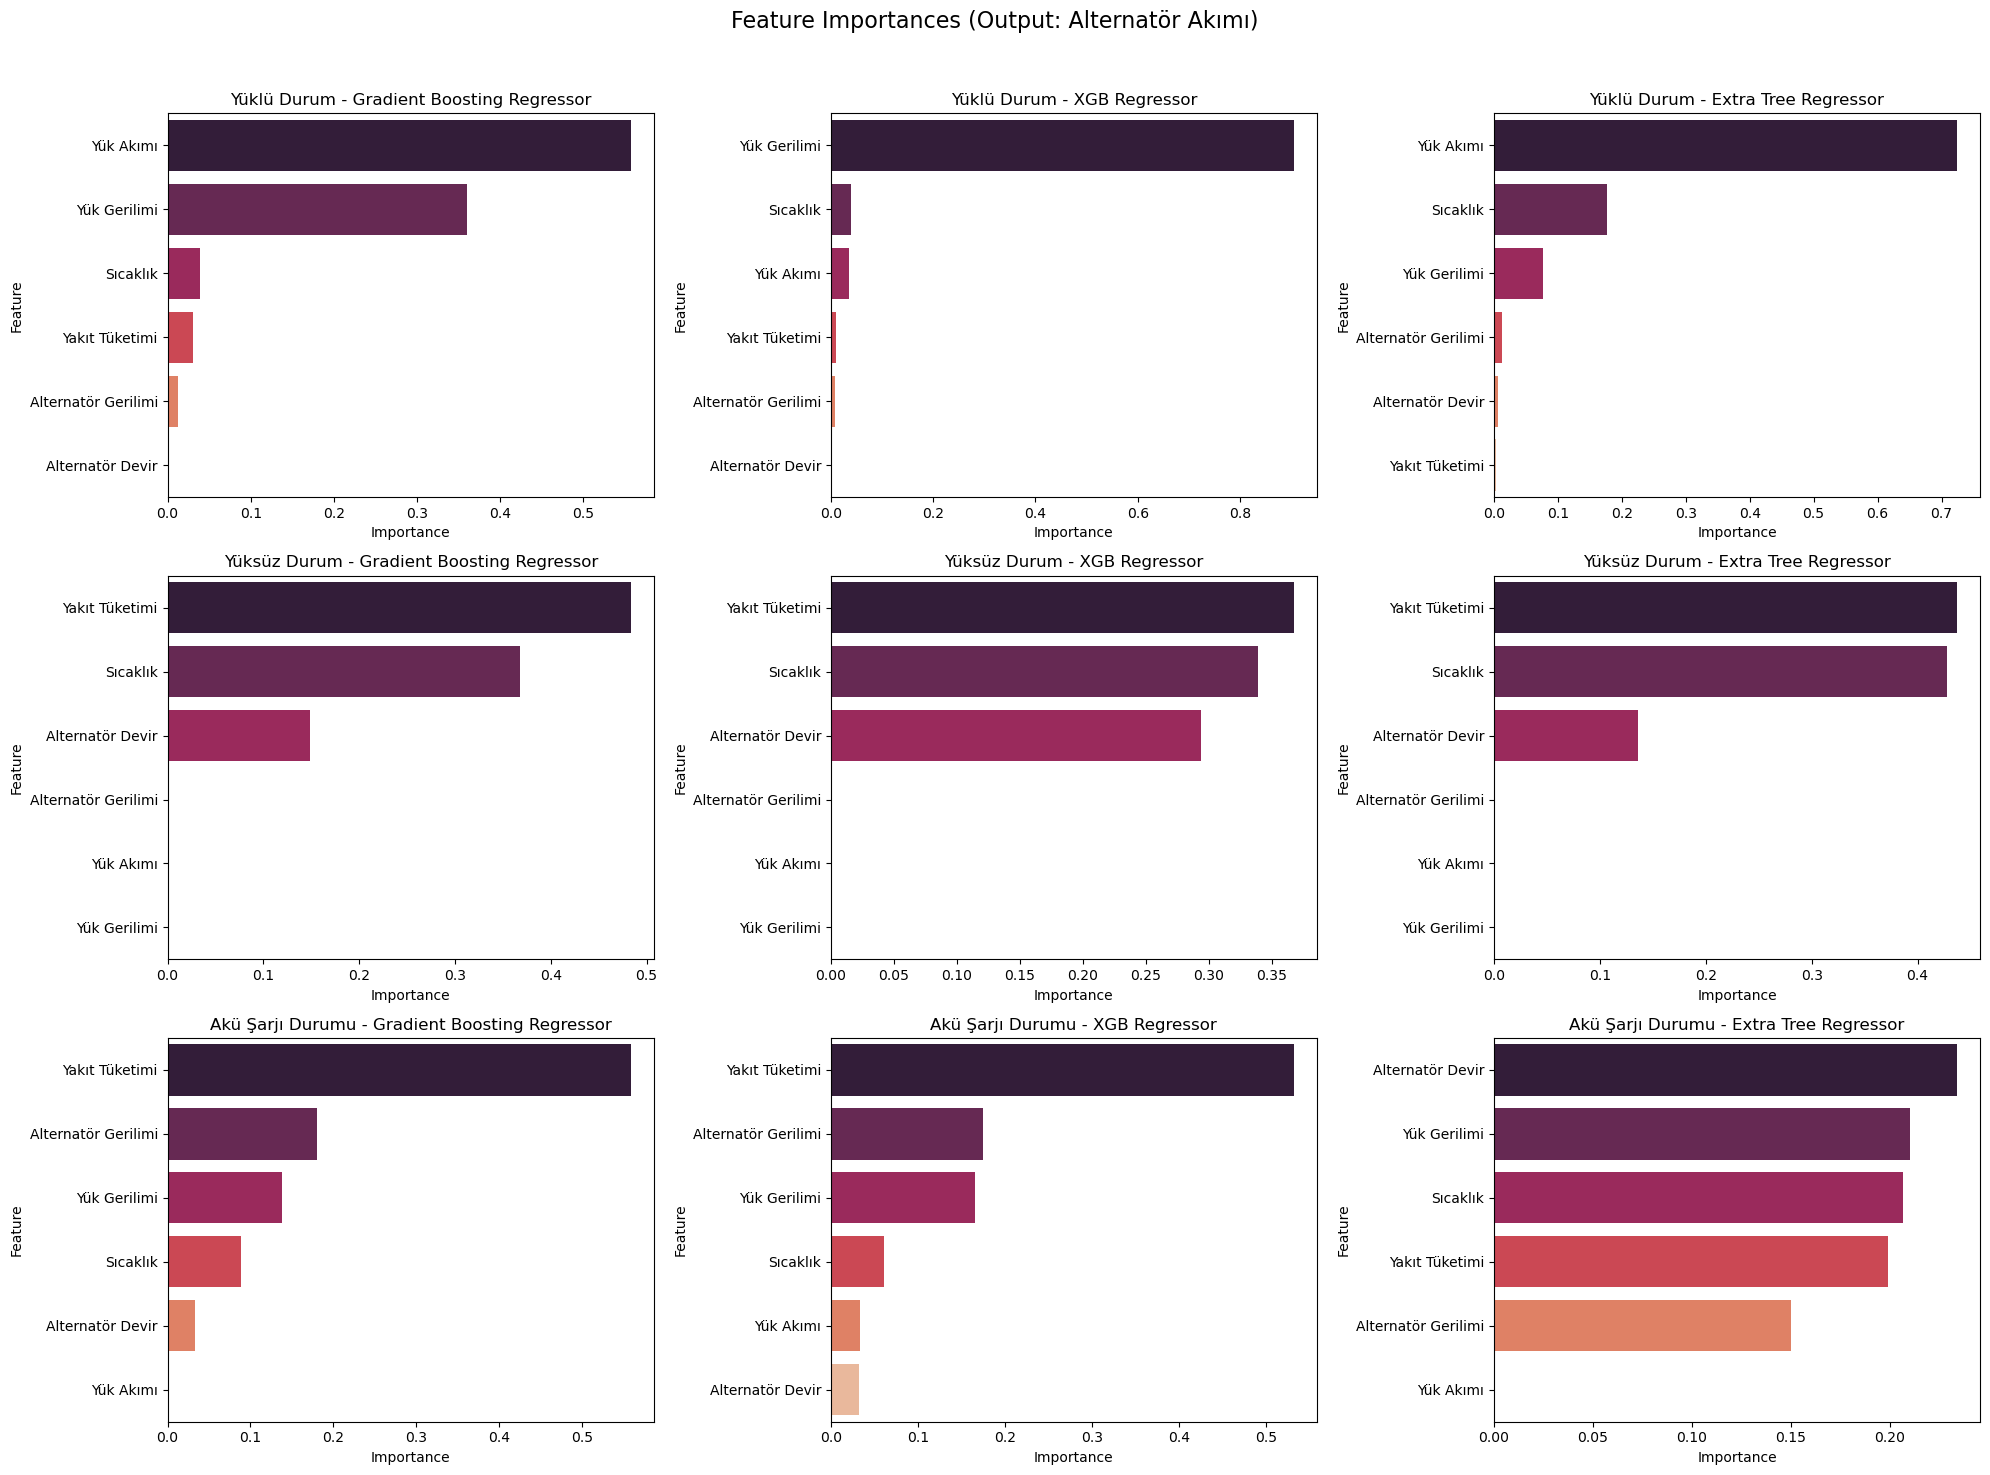

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

def feature_importance_plot(datas):
    feature_importances = {}

    for name, data in datas.items():
        x_al_akım = data.drop(['Alternatör Akımı', 'Durum'], axis=1)
        y_al_akım = data['Alternatör Akımı']

        x_train, x_test, y_train, y_test = train_test_split(x_al_akım, y_al_akım, test_size=0.20, random_state=42)

        grb = GradientBoostingRegressor(n_estimators=100, random_state=42)
        xgb = XGBRegressor()
        ext = ExtraTreeRegressor()

        grb.fit(x_train, y_train)
        xgb.fit(x_train, y_train)
        ext.fit(x_train, y_train)

        feature_importances_grb = pd.DataFrame({
            "Feature": x_al_akım.columns,
            "Importance": grb.feature_importances_
        }).sort_values(by="Importance", ascending=False)

        feature_importances_xgb = pd.DataFrame({
            "Feature": x_al_akım.columns,
            "Importance": xgb.feature_importances_
        }).sort_values(by="Importance", ascending=False)

        feature_importances_ext = pd.DataFrame({
            "Feature": x_al_akım.columns,
            "Importance": ext.feature_importances_
        }).sort_values(by="Importance", ascending=False)

        feature_importances[name] = [feature_importances_grb, feature_importances_xgb, feature_importances_ext]

    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Feature Importances (Output: Alternatör Akımı)', fontsize=16)

    row_titles = ['Yüklü Durum', 'Yüksüz Durum', 'Akü Şarjı Durumu']
    model_titles = ['Gradient Boosting Regressor', 'XGB Regressor', 'Extra Tree Regressor']

    for i, (name, importance_list) in enumerate(feature_importances.items()):
        for j, importance_df in enumerate(importance_list):
            ax = axes[i, j]
            sns.barplot(data=importance_df, x="Importance", y="Feature", palette='rocket', ax=ax)
            ax.set_title(f"{row_titles[i]} - {model_titles[j]}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

datas = { 
    'Yüklü Durum': df_yuklu,
    'Yüksüz Durum': df_yuksuz,
    'Akü Şarjı Durumu': df_aku
}

feature_importance_plot(datas)


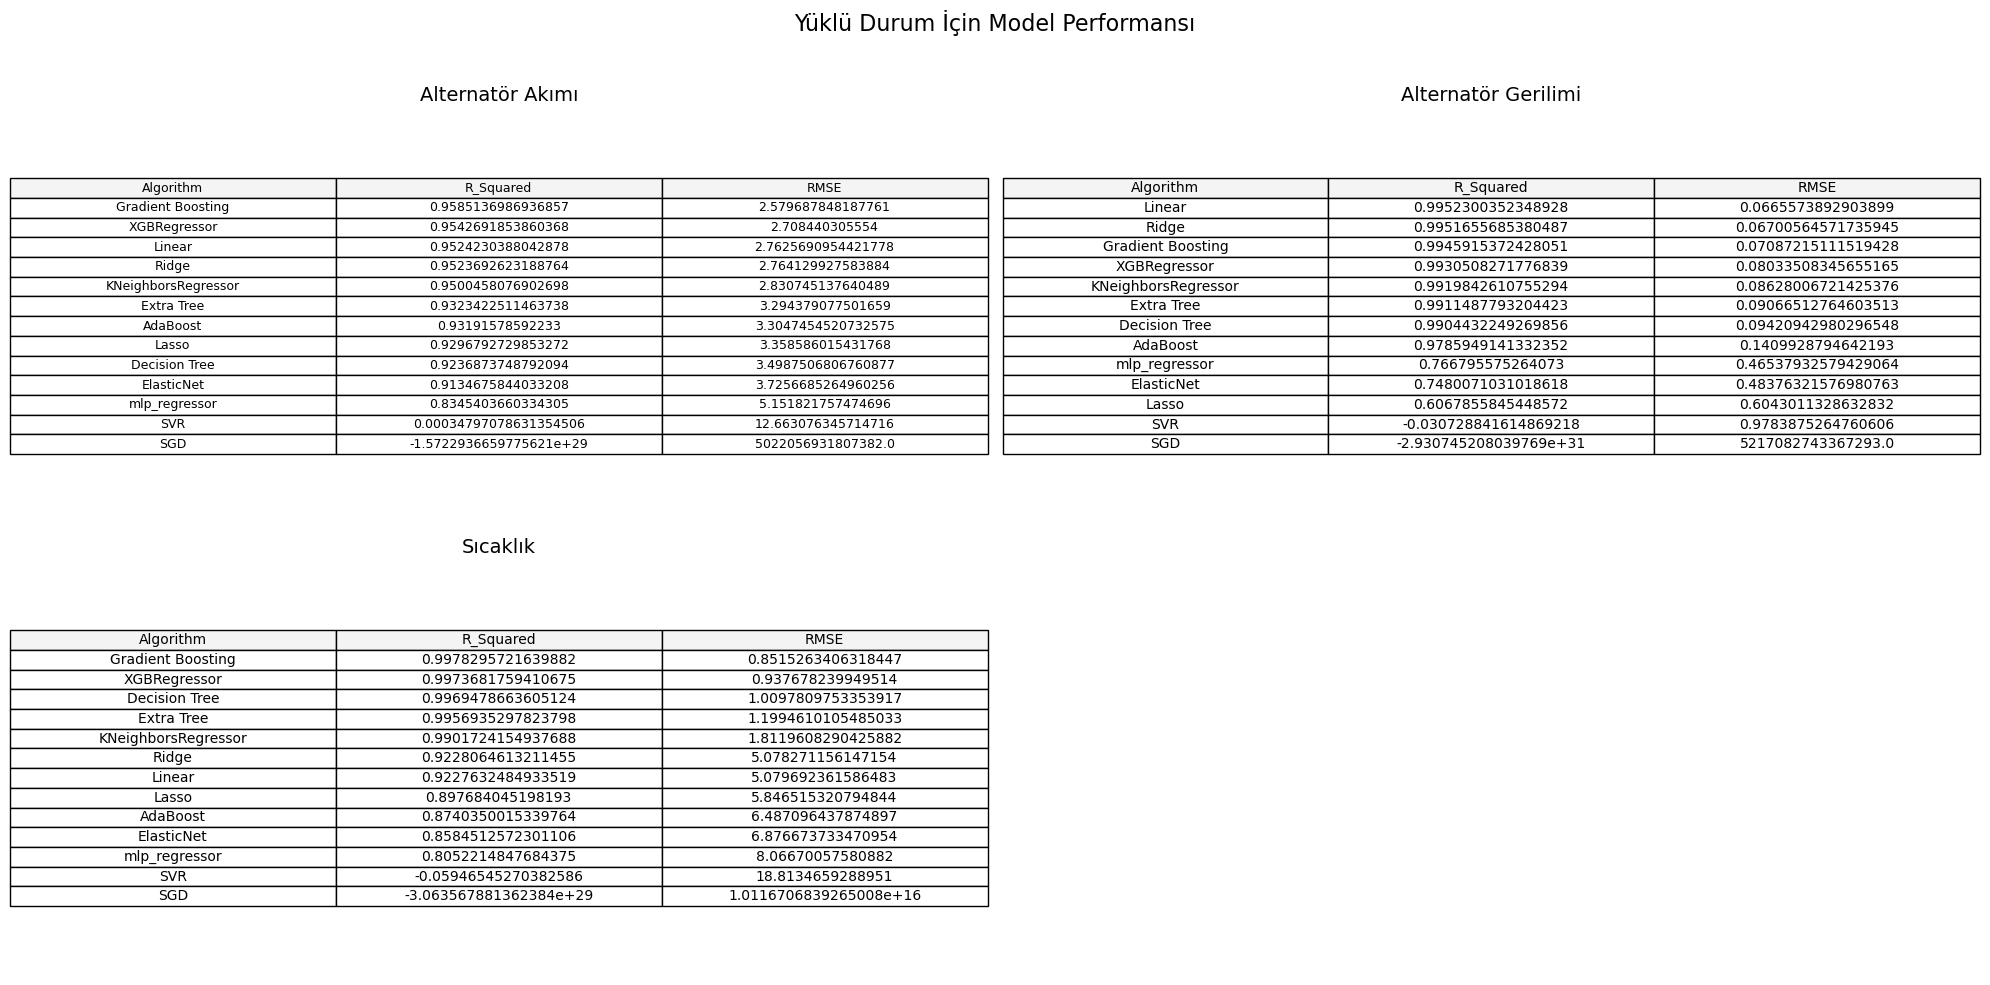

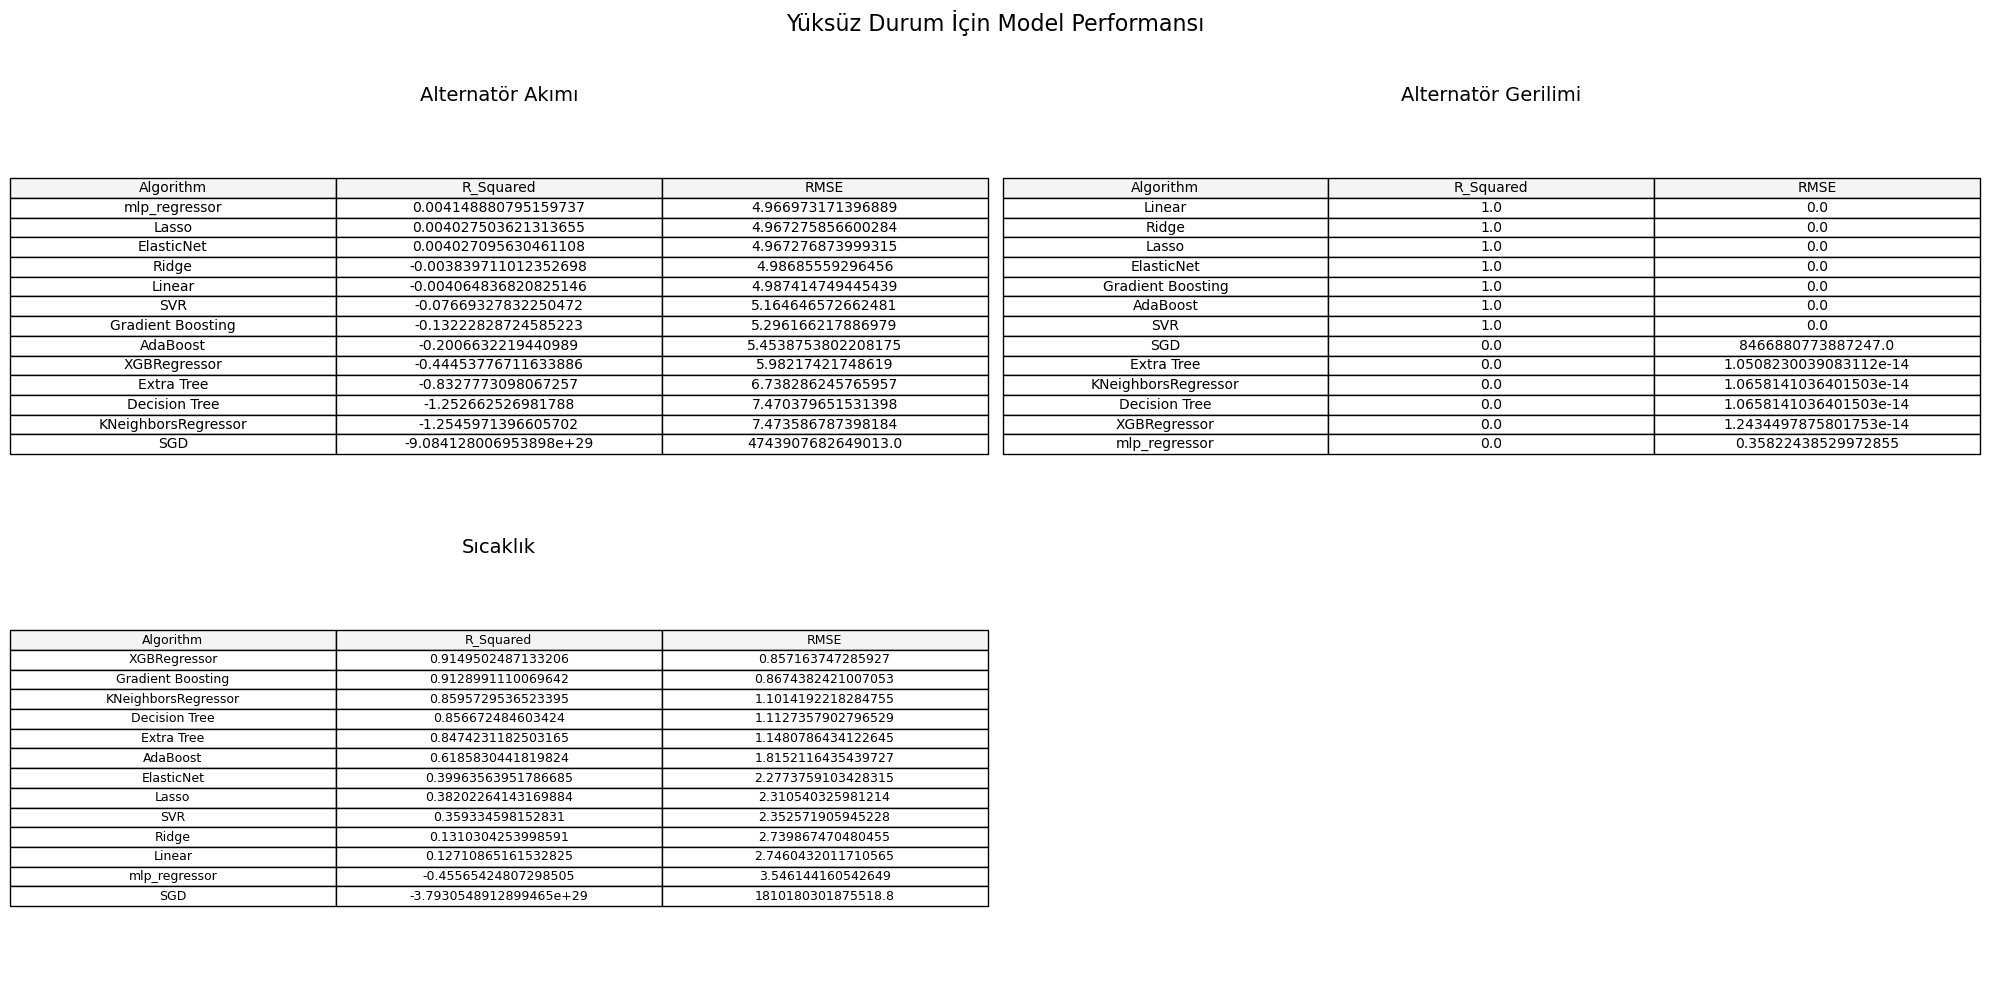

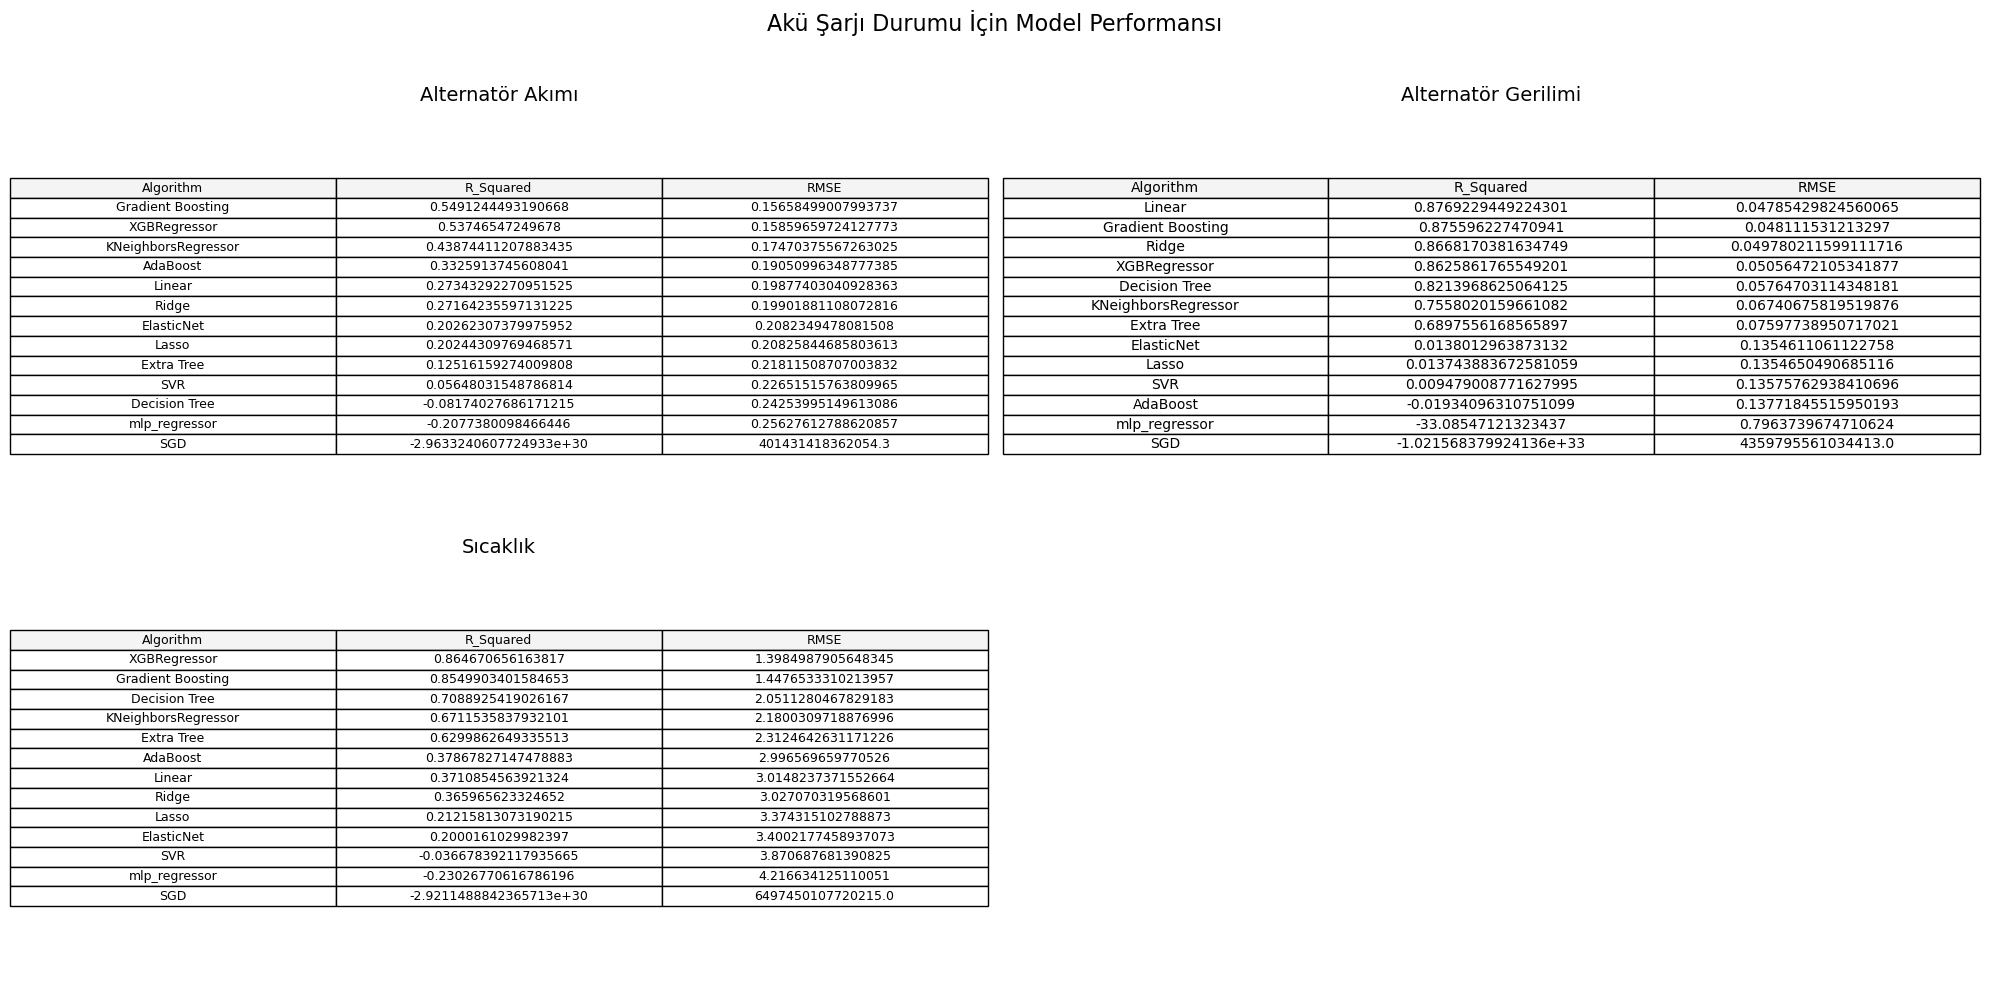

In [45]:
def multi_target_algo_test(datas):
    target_columns = ['Alternatör Akımı', 'Alternatör Gerilimi', 'Sıcaklık']
    
    results = {}
    
    for target in target_columns:
        for name, data in datas.items():
            x = data.drop([target, 'Durum'], axis=1) 
            y = data[target]  
            
            result = algo_test(x, y)  
            results[f"{name} - {target}"] = result
    
    return results

datas = {
    'Yüklü Durum': df_yuklu,
    'Yüksüz Durum': df_yuksuz,
    'Akü Şarjı Durumu': df_aku
}



final_results = multi_target_algo_test(datas)

def display_results_as_subplot(final_results):
    conditions = ['Yüklü Durum', 'Yüksüz Durum', 'Akü Şarjı Durumu']
    
    for condition in conditions:
        fig, axes = plt.subplots(2, 2, figsize=(20, 10))
        axes = axes.flatten()  
        
        fig.suptitle(f"{condition} İçin Model Performansı", fontsize=16)

        i = 0 
        
        for target in ['Alternatör Akımı', 'Alternatör Gerilimi', 'Sıcaklık']:
            key = f"{condition} - {target}"
            
            ax = axes[i]
            ax.axis('off')  
            value = final_results[key]
            
            ax.table(cellText=value.values, 
                     colLabels=value.columns, 
                     cellLoc='center', 
                     loc='center', 
                     colColours=['#f4f4f4'] * len(value.columns))  
            ax.set_title(f"{target}", fontsize=14)
            
            i += 1
        
        for j in range(i, len(axes)):
            axes[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.96])  
        plt.show()

display_results_as_subplot(final_results)

